# Telecom Churn Group Case Study - Upgrad (Shantanu_Sohit_Abhijit)

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. Our task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.

Goal of the case study is to build ML models to predict churn. The predictive model that we're going to build will have following purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
  
- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.
  
- Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

- Recommend strategies to manage customer churn based on your observations.

### Steps Taken (Table of content) :-

- Step 1 - Loading dependencies & datasets
- Step 2 - Reading and understanding the data
- Step 3 - Handling Missing data & Preprocessing
- Step 4 - Exploratory Data Analysis
- Step 5 - Feature engineering
- Step 6 - Create X, y and then Train test split
- Step 7 - Smote analysis and Scaliing
- Step 8 - Model building
- Step 9 - Pre-processing on Test.csv
- Step 10 - Preparing Submission file

### Step 1 - Loading dependencies & datasets

In [4]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

from sklearn.model_selection import StratifiedKFold

#Scipy
import scipy.stats as stats

#xgboost
import xgboost as xgb


#import datetime

import datetime

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# show max. columns
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# import smote
from imblearn.over_sampling import SMOTE

# ROC AU score
from sklearn.metrics import roc_auc_score

In [5]:
db = pd.read_csv("train.csv")
db_test = pd.read_csv("test.csv")
db_dict = pd.read_csv("data_dictionary.csv")

print("train.csv shape =>",db.shape)
print("test.csv shape =>",db_test.shape)

train.csv shape => (69999, 172)
test.csv shape => (30000, 171)


### Step 2 - Reading and understanding the data

In [7]:
#check the data dictionary shared for info.
db_dict.describe()

Acronyms Description
count          36          36
unique         36          35
top     CIRCLE_ID   G network
freq            1           2

In [8]:
# To view the description of various variables present in dataset
db_dict

Acronyms  \
0     CIRCLE_ID   
1           LOC   
2           STD   
3            IC   
4            OG   
5           T2T   
6       T2M       
7       T2O       
8       T2F       
9       T2C       
10     ARPU       
11      MOU       
12      AON       
13     ONNET      
14   OFFNET       
15         ROAM   
16       SPL      
17      ISD       
18     RECH       
19      NUM       
20      AMT       
21      MAX       
22     DATA       
23       3G       
24       AV       
25      VOL       
26       2G       
27      PCK       
28    NIGHT       
29  MONTHLY       
30    SACHET      
31      *.6       
32      *.7       
33      *.8       
34      FB_USER   
35      VBC       

                                                                          Description  
0                                Telecom circle area to which the customer belongs to  
1                                             Local calls  within same telecom circle  
2                                               STD calls  outside the calling circle  
3                                                                      Incoming calls  
4                                                                      Outgoing calls  
5                            Operator T to T ie within same operator mobile to mobile  
6                                                 Operator T to other operator mobile  
7                                             Operator T to other operator fixed line  
8                                                      Operator T to fixed lines of T  
9                                                   Operator T to its own call center  
10                                                           Average revenue per user  
11                                                      Minutes of usage  voice calls  
12        Age on network  number of days the customer is using the operator T network  
13                                 All kind of calls within the same operator network  
14                                   All kind of calls outside the operator T network  
15                         Indicates that customer is in roaming zone during the call  
16                                                                      Special calls  
17                                                                          ISD calls  
18                                                                           Recharge  
19                                                                             Number  
20                                                           Amount in local currency  
21                                                                            Maximum  
22                                                                    Mobile internet  
23                                                                          G network  
24                                                                            Average  
25                                                 Mobile internet usage volume in MB  
26                                                                          G network  
27                                              Prepaid service schemes called  PACKS  
28                                     Scheme to use during specific night hours only  
29                                Service schemes with validity equivalent to a month  
30                                 Service schemes with validity smaller than a month  
31                                                          KPI for the month of June  
32                                                          KPI for the month of July  
33                                                        KPI for the month of August  
34   Service scheme to avail services of Facebook and similar social networking sites  
35  Volume based cost  when no specific scheme is not purchased and paid as per usage

In [9]:
db.head(10)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   
5   5        109             0.0             0.0             0.0   
6   6        109             0.0             0.0             0.0   
7   7        109             0.0             0.0             0.0   
8   8        109             0.0             0.0             0.0   
9   9        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   
5            6/30/2014            7/31/2014            8/31/2014   86.193   
6            6/30/2014            7/31/2014            8/31/2014   54.173   
7            6/30/2014            7/31/2014            8/31/2014  167.861   
8            6/30/2014            7/31/2014            8/31/2014  163.550   
9            6/30/2014            7/31/2014            8/31/2014  101.984   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   
5   83.351   88.462         1.39         1.78         0.45         17.14   
6   95.130    6.386        38.81        40.56        19.61         31.63   
7  167.869  167.866         0.00         0.00         0.00          0.00   
8   90.250   51.726         0.00         0.00         0.00         47.81   
9  259.265   65.686        27.49       111.78        53.38        110.51   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00           0.00           0.00   
1         25.99         30.89           0.00           0.00           0.00   
2         82.05          0.00           0.00           0.00           0.00   
3         78.48         50.23           0.00           0.00           0.00   
4         38.11          9.63          53.64           0.00           0.00   
5         24.26          3.44           0.00           0.00           0.00   
6         54.18          5.69           0.00           0.00           0.00   
7          0.00          0.00           0.00           0.00           0.00   
8         50.88         21.74          28.26          11.31          47.81   
9        124.04         85.54           0.00           7.23           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              2.23   
1           0.00           0.00           0.00              0.00   
2           0.00           0.00           0.00              0.53   
3           0.00           0.00           1.63              6.99   
4          15.73           0.00           0.00             10.16   
5           0.00           0.00           0.00              1.39   
6           0.00           0.00           0.00             38.81   
7           0.00           0.00           0.00              0.00   
8          47.81          50.88          21.74              0.00   
9           0.00          32.2

In [10]:
db_test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [11]:
db.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [12]:
db.describe(include="all")

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   69999.000000    69999.0         69297.0         69297.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    34999.000000      109.0             0.0             0.0   
std     20207.115084        0.0             0.0             0.0   
min         0.000000      109.0             0.0             0.0   
25%     17499.500000      109.0             0.0             0.0   
50%     34999.000000      109.0             0.0             0.0   
75%     52498.500000      109.0             0.0             0.0   
max     69998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          69297.0                69999                69600   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                69999                69600   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7        arpu_8  \
count                 69266  69999.000000  69999.000000  69999.000000   
unique                    1           NaN           NaN           NaN   
top               8/31/2014           NaN           NaN           NaN   
freq                  69266           NaN           NaN           NaN   
mean                    NaN    283.134365    278.185912    278.858826   
std                     NaN    334.213918    344.366927    351.924315   
min                     NaN  -2258.709000  -1289.715000   -945.808000   
25%                     NaN     93.581000     86.714000     84.095000   
50%                     NaN    197.484000    191.588000    192.234000   
75%                     NaN    370.791000    365.369500    369.909000   
max                     NaN  27731.088000  35145.834000  33543.624000   

         onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count   67231.000000  67312.000000  66296.000000  67231.000000  67312.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      133.153275    133.894438    132.978257    198.874771    197.153383   
std       299.963093    311.277193    311.896596    316.818355    322.482226   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         7.410000      6.675000      6.410000     34.860000     32.240000   
50%        34.110000     32.280000     32.100000     96.480000     91.885000   
75%       119.390000    115.837500    115.060000    232.990000    227.630000   
max      7376.710000   8157.780000  10752.560000   8362.360000   7043.980000   

        offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count   66296.000000   67231.000000   67312.000000   66296.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean      196.543577       9.765435       7.014568       7.004892   
std       324.089234      57.374429      55.960985      53.408135   
min         0.000000       0.000000       0.000000       0.000000   
25%   

As we can see there are lots of null values, along with outliers. 
Let's see the datatypes of ll the variables



In [14]:
# check the db
def check_db(db) :
    return pd.DataFrame({
                'Datatype' : db.dtypes.astype(str),
                'Null_Count': db.isnull().sum().astype(int),
                'Null_Percentage(missing values)': round(db.isnull().sum()/len(db) * 100),
                'Non_Null_Count': db.count(axis = 0).astype(int),
                'Unique_Values_Count': db.nunique().astype(int)
                 }).sort_values(by='Null_Percentage(missing values)', ascending=False)

check_db(db)

Datatype  Null_Count  \
arpu_3g_6                 float64       52431   
av_rech_amt_data_6        float64       52431   
count_rech_2g_6           float64       52431   
total_rech_data_6         float64       52431   
count_rech_3g_6           float64       52431   
fb_user_6                 float64       52431   
max_rech_data_6           float64       52431   
date_of_last_rech_data_6   object       52431   
night_pck_user_6          float64       52431   
arpu_2g_6                 float64       52431   
arpu_2g_8                 float64       51582   
fb_user_7                 float64       52134   
date_of_last_rech_data_7   object       52134   
date_of_last_rech_data_8   object       51582   
night_pck_user_7          float64       52134   
fb_user_8                 float64       51582   
total_rech_data_7         float64       52134   
total_rech_data_8         float64       51582   
max_rech_data_7           float64       52134   
count_rech_3g_7           float64       52134   
count_rech_2g_8           float64       51582   
arpu_3g_7                 float64       52134   
arpu_3g_8                 float64       51582   
arpu_2g_7                 float64       52134   
av_rech_amt_data_8        float64       51582   
av_rech_amt_data_7        float64       52134   
count_rech_3g_8           float64       51582   
night_pck_user_8          float64       51582   
count_rech_2g_7           float64       52134   
max_rech_data_8           float64       51582   
std_ic_t2f_mou_8          float64        3703   
std_og_t2c_mou_8          float64        3703   
std_ic_t2o_mou_8          float64        3703   
std_ic_mou_8              float64        3703   
isd_og_mou_8              float64        3703   
spl_og_mou_8              float64        3703   
std_og_mou_8              float64        3703   
loc_ic_t2t_mou_8          float64        3703   
og_others_8               float64        3703   
std_ic_t2m_mou_8          float64        3703   
std_og_t2f_mou_8          float64        3703   
loc_ic_t2m_mou_8          float64        3703   
std_ic_t2t_mou_8          float64        3703   
loc_ic_t2f_mou_8          float64        3703   
spl_ic_mou_8              float64        3703   
loc_og_mou_8              float64        3703   
std_og_t2t_mou_8          float64        3703   
loc_og_t2m_mou_8          float64        3703   
loc_og_t2c_mou_8          float64        3703   
loc_og_t2t_mou_8          float64        3703   
loc_ic_mou_8              float64        3703   
ic_others_8               float64        3703   
roam_og_mou_8             float64        3703   
loc_og_t2f_mou_8          float64        3703   
roam_ic_mou_8             float64        3703   
offnet_mou_8              float64        3703   
isd_ic_mou_8              float64        3703   
std_og_t2m_mou_8          float64        3703   
onnet_mou_8               float64        3703   
std_ic_t2m_mou_6          float64        2768   
std_ic_t2m_mou_7          float64        2687   
std_ic_t2t_mou_7          float64        2687   
std_ic_t2f_mou_6          float64        2768   
isd_ic_mou_6              float64        2768   
std_ic_t2f_mou_7          float64        2687   
date_of_last_rech_8        object        2461   
isd_ic_mou_7              float64        2687   
std_ic_t2o_mou_7          float64        2687   
ic_others_7               float64        2687   
std_ic_mou_6              float64        2768   
std_ic_mou_7              float64        2687   
ic_others_6               float64        2768   
spl_ic_mou_6              float64        2768   
spl_ic_mou_7              float64        2687   
std_ic_t2t_mou_6          float64        2768   
std_ic_t2o_mou_6          float64        2768   
loc_ic_mou_7              float64        2687   
std_og_t2m_mou_7          float64        2687   
std_og_t2t_mou_7          float64        2687   
std_og_t2t_mou_6          float64        2768   
loc_ic_mou_6              float64        2768   
loc_og_

In [15]:
# checking for duplicates

db.duplicated().sum()

0

No duplicate data present

In [17]:
#- dataframe/ db is in different data type.
#- imputation of values (segreggation accordion of data types)
#- relation between variables
#- train test split - 80/20
#- logistic regression
#- decision tree
#- Xgboosting

### Step 3 - Handling Missing data & Preprocessing

In [19]:
# Let check the missing values by different data types
db_int = db.select_dtypes(include=[int])
db_float = db.select_dtypes(include=[float])
db_object = db.select_dtypes(include=[object])

# Check for missing values in each DataFrame
print("Integer DataFrames:")
print(db_int.isnull().sum())



Integer DataFrames:
id                    0
circle_id             0
total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
monthly_2g_6          0
monthly_2g_7          0
monthly_2g_8          0
sachet_2g_6           0
sachet_2g_7           0
sachet_2g_8           0
monthly_3g_6          0
monthly_3g_7          0
monthly_3g_8          0
sachet_3g_6           0
sachet_3g_7           0
sachet_3g_8           0
aon                   0
churn_probability     0
dtype: int64


In [20]:
print("\nFloat DataFrames:")
print(db_float.isnull().sum())


Float DataFrames:
loc_og_t2o_mou          702
std_og_t2o_mou          702
loc_ic_t2o_mou          702
arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6            2768
onnet_mou_7            2687
onnet_mou_8            3703
offnet_mou_6           2768
offnet_mou_7           2687
offnet_mou_8           3703
roam_ic_mou_6          2768
roam_ic_mou_7          2687
roam_ic_mou_8          3703
roam_og_mou_6          2768
roam_og_mou_7          2687
roam_og_mou_8          3703
loc_og_t2t_mou_6       2768
loc_og_t2t_mou_7       2687
loc_og_t2t_mou_8       3703
loc_og_t2m_mou_6       2768
loc_og_t2m_mou_7       2687
loc_og_t2m_mou_8       3703
loc_og_t2f_mou_6       2768
loc_og_t2f_mou_7       2687
loc_og_t2f_mou_8       3703
loc_og_t2c_mou_6       2768
loc_og_t2c_mou_7       2687
loc_og_t2c_mou_8       3703
loc_og_mou_6           2768
loc_og_mou_7           2687
loc_og_mou_8           3703
std_og_t2t_mou_6       2768
std_og_t2t_mou_7       2687
s

In [21]:
print("\nObject DataFrames:")
print(db_object.isnull().sum())


Object DataFrames:
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
date_of_last_rech_6          1101
date_of_last_rech_7          1234
date_of_last_rech_8          2461
date_of_last_rech_data_6    52431
date_of_last_rech_data_7    52134
date_of_last_rech_data_8    51582
dtype: int64


In [22]:
# Replace empty int with 0 without modifying the original DataFrame
db_int_replaced = db_int.replace("", 0)

# Count the number of empty int in the DataFrame after replacement
num_empty_int = (db_int_replaced == "").sum()

print(num_empty_int)

id                    0
circle_id             0
total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
monthly_2g_6          0
monthly_2g_7          0
monthly_2g_8          0
sachet_2g_6           0
sachet_2g_7           0
sachet_2g_8           0
monthly_3g_6          0
monthly_3g_7          0
monthly_3g_8          0
sachet_3g_6           0
sachet_3g_7           0
sachet_3g_8           0
aon                   0
churn_probability     0
dtype: int64


In [23]:
# Replace empty float with 0 without modifying the original DataFrame
db_float_replaced = db_float.replace("", 0)

# Count the number of empty float in the DataFrame after replacement
num_empty_float = (db_float_replaced == "").sum()

print(num_empty_float)

loc_og_t2o_mou        0
std_og_t2o_mou        0
loc_ic_t2o_mou        0
arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8

In [24]:
# Replace empty object with 0 without modifying the original DataFrame
db_object_replaced = db_object.replace("", 0)

# Count the number of empty object in the DataFrame after replacement
num_empty_object = (db_object_replaced == "").sum()

print(num_empty_object)

last_date_of_month_6        0
last_date_of_month_7        0
last_date_of_month_8        0
date_of_last_rech_6         0
date_of_last_rech_7         0
date_of_last_rech_8         0
date_of_last_rech_data_6    0
date_of_last_rech_data_7    0
date_of_last_rech_data_8    0
dtype: int64


In [25]:
## Number of missing values
print('Number of missing values:',db.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',db.nunique().sum())

Number of missing values: 1835086
Number of unique values: 1375105


In [26]:
db.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [27]:
# Checking for missing value percentage
pd.DataFrame((db.isnull().sum()/len(db)*100).sort_values(ascending=False))

0
arpu_3g_6                 74.902499
count_rech_2g_6           74.902499
night_pck_user_6          74.902499
arpu_2g_6                 74.902499
date_of_last_rech_data_6  74.902499
total_rech_data_6         74.902499
av_rech_amt_data_6        74.902499
max_rech_data_6           74.902499
count_rech_3g_6           74.902499
fb_user_6                 74.902499
night_pck_user_7          74.478207
date_of_last_rech_data_7  74.478207
total_rech_data_7         74.478207
max_rech_data_7           74.478207
fb_user_7                 74.478207
count_rech_2g_7           74.478207
count_rech_3g_7           74.478207
arpu_3g_7                 74.478207
av_rech_amt_data_7        74.478207
arpu_2g_7                 74.478207
count_rech_2g_8           73.689624
av_rech_amt_data_8        73.689624
night_pck_user_8          73.689624
max_rech_data_8           73.689624
total_rech_data_8         73.689624
arpu_2g_8                 73.689624
arpu_3g_8                 73.689624
date_of_last_rech_data_8  73.689624
fb_user_8                 73.689624
count_rech_3g_8           73.689624
isd_og_mou_8               5.290076
std_ic_t2o_mou_8           5.290076
std_og_t2c_mou_8           5.290076
std_ic_t2f_mou_8           5.290076
std_og_mou_8               5.290076
std_ic_t2m_mou_8           5.290076
std_ic_mou_8               5.290076
std_ic_t2t_mou_8           5.290076
og_others_8                5.290076
spl_og_mou_8               5.290076
loc_ic_t2m_mou_8           5.290076
loc_ic_mou_8               5.290076
loc_ic_t2f_mou_8           5.290076
std_og_t2f_mou_8           5.290076
loc_og_t2c_mou_8           5.290076
ic_others_8                5.290076
loc_og_mou_8               5.290076
onnet_mou_8                5.290076
offnet_mou_8               5.290076
roam_ic_mou_8              5.290076
roam_og_mou_8              5.290076
loc_og_t2t_mou_8           5.290076
loc_og_t2m_mou_8           5.290076
loc_og_t2f_mou_8           5.290076
std_og_t2m_mou_8           5.290076
loc_ic_t2t_mou_8           5.290076
isd_ic_mou_8               5.290076
std_og_t2t_mou_8           5.290076
spl_ic_mou_8               5.290076
std_ic_t2m_mou_6           3.954342
std_ic_t2t_mou_6           3.954342
loc_ic_t2m_mou_6           3.954342
ic_others_6                3.954342
loc_ic_mou_6               3.954342
std_ic_t2f_mou_6           3.954342
isd_ic_mou_6               3.954342
std_ic_mou_6               3.954342
spl_ic_mou_6               3.954342
std_ic_t2o_mou_6           3.954342
loc_ic_t2f_mou_6           3.954342
isd_og_mou_6               3.954342
std_og_t2m_mou_6           3.954342
std_og_t2f_mou_6           3.954342
loc_og_mou_6               3.954342
loc_og_t2c_mou_6           3.954342
std_og_t2c_mou_6           3.954342
loc_og_t2f_mou_6           3.954342
loc_og_t2m_mou_6           3.954342
std_og_mou_6               3.954342
loc_og_t2t_mou_6           3.954342
std_og_t2t_mou_6           3.954342
loc_ic_t2t_mou_6           3.954342
spl_og_mou_6               3.954342
onnet_mou_6                3.954342
roam_ic_mou_6              3.954342
og_others_6                3.954342
roam_og_mou_6              3.954342
offnet_mou_6               3.954342
roam_og_mou_7              3.838626
ic_others_7                3.838626
loc_og_mou_7               3.838626
onnet_mou_7                3.838626
loc_ic_t2t_mou_7           3.838626
loc_og_t2f_mou_7           3.838626
loc_og_t2c_mou_7           3.838626
offnet_mou_7               3.838626
loc_og_t2m_mou_7           3.838626
roam_ic_mou_7              3.838626
std_og_t2t_mou_7           3.838626
loc_og_t2t_mou_7           3.838626
loc_ic_t2m_mou_7           3.838626
isd_ic_mou_7               3.838626
loc_ic_t2f_mou_7           3.838626
loc_ic_mou_7               3.838626
spl_og_mou_7               3.838626
std_ic_t2t_mou_7           3.838626
isd_og_mou_7               3.838626
std_ic_t2m_mou_7           3.838626
std_og_mou_7               3.838626
std_ic_t2f_mou_7           3.838626
std_og_t2m_mou_7           3.838626
st

In [28]:
# Removing column with 30% or more null values as it will reduce the impact on analysis
db = db.loc[:,db.isnull().sum()/db.shape[0]*100<30]
# Shape of the dataframe after removing columns
db.shape

(69999, 142)

In [29]:
# Checking for missing value percentage
pd.DataFrame((db.isnull().sum()/len(db)*100).sort_values(ascending=False))

0
roam_og_mou_8         5.290076
og_others_8           5.290076
spl_og_mou_8          5.290076
loc_ic_t2t_mou_8      5.290076
loc_og_t2m_mou_8      5.290076
loc_og_t2c_mou_8      5.290076
loc_ic_t2m_mou_8      5.290076
loc_og_t2t_mou_8      5.290076
loc_ic_t2f_mou_8      5.290076
std_og_t2f_mou_8      5.290076
loc_ic_mou_8          5.290076
isd_og_mou_8          5.290076
roam_ic_mou_8         5.290076
std_ic_t2t_mou_8      5.290076
loc_og_mou_8          5.290076
offnet_mou_8          5.290076
std_ic_t2m_mou_8      5.290076
onnet_mou_8           5.290076
std_ic_t2f_mou_8      5.290076
std_og_mou_8          5.290076
std_ic_t2o_mou_8      5.290076
std_og_t2t_mou_8      5.290076
std_ic_mou_8          5.290076
spl_ic_mou_8          5.290076
std_og_t2c_mou_8      5.290076
isd_ic_mou_8          5.290076
std_og_t2m_mou_8      5.290076
ic_others_8           5.290076
loc_og_t2f_mou_8      5.290076
isd_og_mou_6          3.954342
spl_og_mou_6          3.954342
std_og_mou_6          3.954342
loc_ic_t2f_mou_6      3.954342
loc_ic_t2t_mou_6      3.954342
loc_ic_t2m_mou_6      3.954342
loc_ic_mou_6          3.954342
std_ic_t2t_mou_6      3.954342
std_ic_t2m_mou_6      3.954342
std_ic_t2f_mou_6      3.954342
std_ic_t2o_mou_6      3.954342
std_ic_mou_6          3.954342
spl_ic_mou_6          3.954342
isd_ic_mou_6          3.954342
ic_others_6           3.954342
std_og_t2c_mou_6      3.954342
og_others_6           3.954342
offnet_mou_6          3.954342
onnet_mou_6           3.954342
loc_og_t2m_mou_6      3.954342
loc_og_t2f_mou_6      3.954342
roam_og_mou_6         3.954342
roam_ic_mou_6         3.954342
loc_og_t2c_mou_6      3.954342
std_og_t2f_mou_6      3.954342
loc_og_mou_6          3.954342
loc_og_t2t_mou_6      3.954342
std_og_t2t_mou_6      3.954342
std_og_t2m_mou_6      3.954342
std_ic_t2o_mou_7      3.838626
onnet_mou_7           3.838626
std_ic_t2f_mou_7      3.838626
loc_og_t2t_mou_7      3.838626
std_ic_mou_7          3.838626
std_ic_t2m_mou_7      3.838626
spl_ic_mou_7          3.838626
roam_ic_mou_7         3.838626
std_ic_t2t_mou_7      3.838626
isd_ic_mou_7          3.838626
roam_og_mou_7         3.838626
loc_ic_mou_7          3.838626
ic_others_7           3.838626
std_og_t2f_mou_7      3.838626
offnet_mou_7          3.838626
loc_ic_t2f_mou_7      3.838626
og_others_7           3.838626
std_og_t2m_mou_7      3.838626
isd_og_mou_7          3.838626
loc_og_mou_7          3.838626
spl_og_mou_7          3.838626
loc_og_t2c_mou_7      3.838626
std_og_t2c_mou_7      3.838626
std_og_mou_7          3.838626
std_og_t2t_mou_7      3.838626
loc_og_t2f_mou_7      3.838626
loc_ic_t2t_mou_7      3.838626
loc_og_t2m_mou_7      3.838626
loc_ic_t2m_mou_7      3.838626
date_of_last_rech_8   3.515765
date_of_last_rech_7   1.762882
date_of_last_rech_6   1.572880
last_date_of_month_8  1.047158
loc_ic_t2o_mou        1.002871
std_og_t2o_mou        1.002871
loc_og_t2o_mou        1.002871
last_date_of_month_7  0.570008
jul_vbc_3g            0.000000
monthly_2g_7          0.000000
vol_2g_mb_7           0.000000
sachet_3g_6           0.000000
sachet_3g_7           0.000000
sachet_3g_8           0.000000
vol_2g_mb_8           0.000000
vol_3g_mb_6           0.000000
vol_3g_mb_7           0.000000
vol_3g_mb_8           0.000000
monthly_2g_6          0.000000
sachet_2g_7           0.000000
monthly_2g_8          0.000000
sachet_2g_6           0.000000
monthly_3g_7          0.000000
last_day_rch_amt_8    0.000000
aon                   0.000000
jun_vbc_3g            0.000000
aug_vbc_3g            0.000000
monthly_3g_8          0.000000
sachet_2g_8           0.000000
monthly_3g_6          0.000000
vol_2g_mb_6           0.000000
id                    0.000000
last_day_rch_amt_7    0.000000
total_ic_mou_7        0.000000
last_date_of_month_6  0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
total_og_mou_6        0.000000
total_og_mou_7        0.000000
total_og_mou_8        0.000000
circle_id             0.000000

In [30]:
# Removing rows with missing values with more than 10 missing values
db.dropna(axis=0,inplace=True,thresh=db.shape[1]-10)
# Shape of the dataframe after removing rows
print(db.shape)

(63842, 142)


In [31]:
# List of columns with Date datatype
db_date_cols = [d for d in db.columns.to_list() if 'date' in d]
db_date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [32]:
# Converting Date columns to datetime datatype and extracting the days before last day
# train data
for i in db_date_cols:
    db[i] = pd.to_datetime(db[i])
    db[i] = db[i].dt.date
    db[i] = pd.to_datetime(db[i])
    db[i] = db[i].dt.daysinmonth - db[i].dt.day


In [33]:
# Removing the columns with only one unique value among date columns
db.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],inplace=True)
db_date_cols.remove('last_date_of_month_6')
db_date_cols.remove('last_date_of_month_7')
db_date_cols.remove('last_date_of_month_8')



In [34]:
# Dropping the date related columns since they are not usage related columns and can't be used for modelling 
#date_columns = db.filter(regex='^date.*').columns
#db.drop(columns=date_columns, inplace=True)
# db.drop(['id'],axis=1,inplace=True)

In [35]:
# Check for columns containing 'date' in their name
#date_columns = [col for col in db.columns if 'date' in col.lower()]

# Print the list of columns containing 'date'
#print("Columns containing 'date':", date_columns)

Dropped all the date columns

In [37]:
# Removing duplicate ID columns
db.drop(['circle_id'],axis=1,inplace=True)

In [38]:
db.shape

(63842, 138)

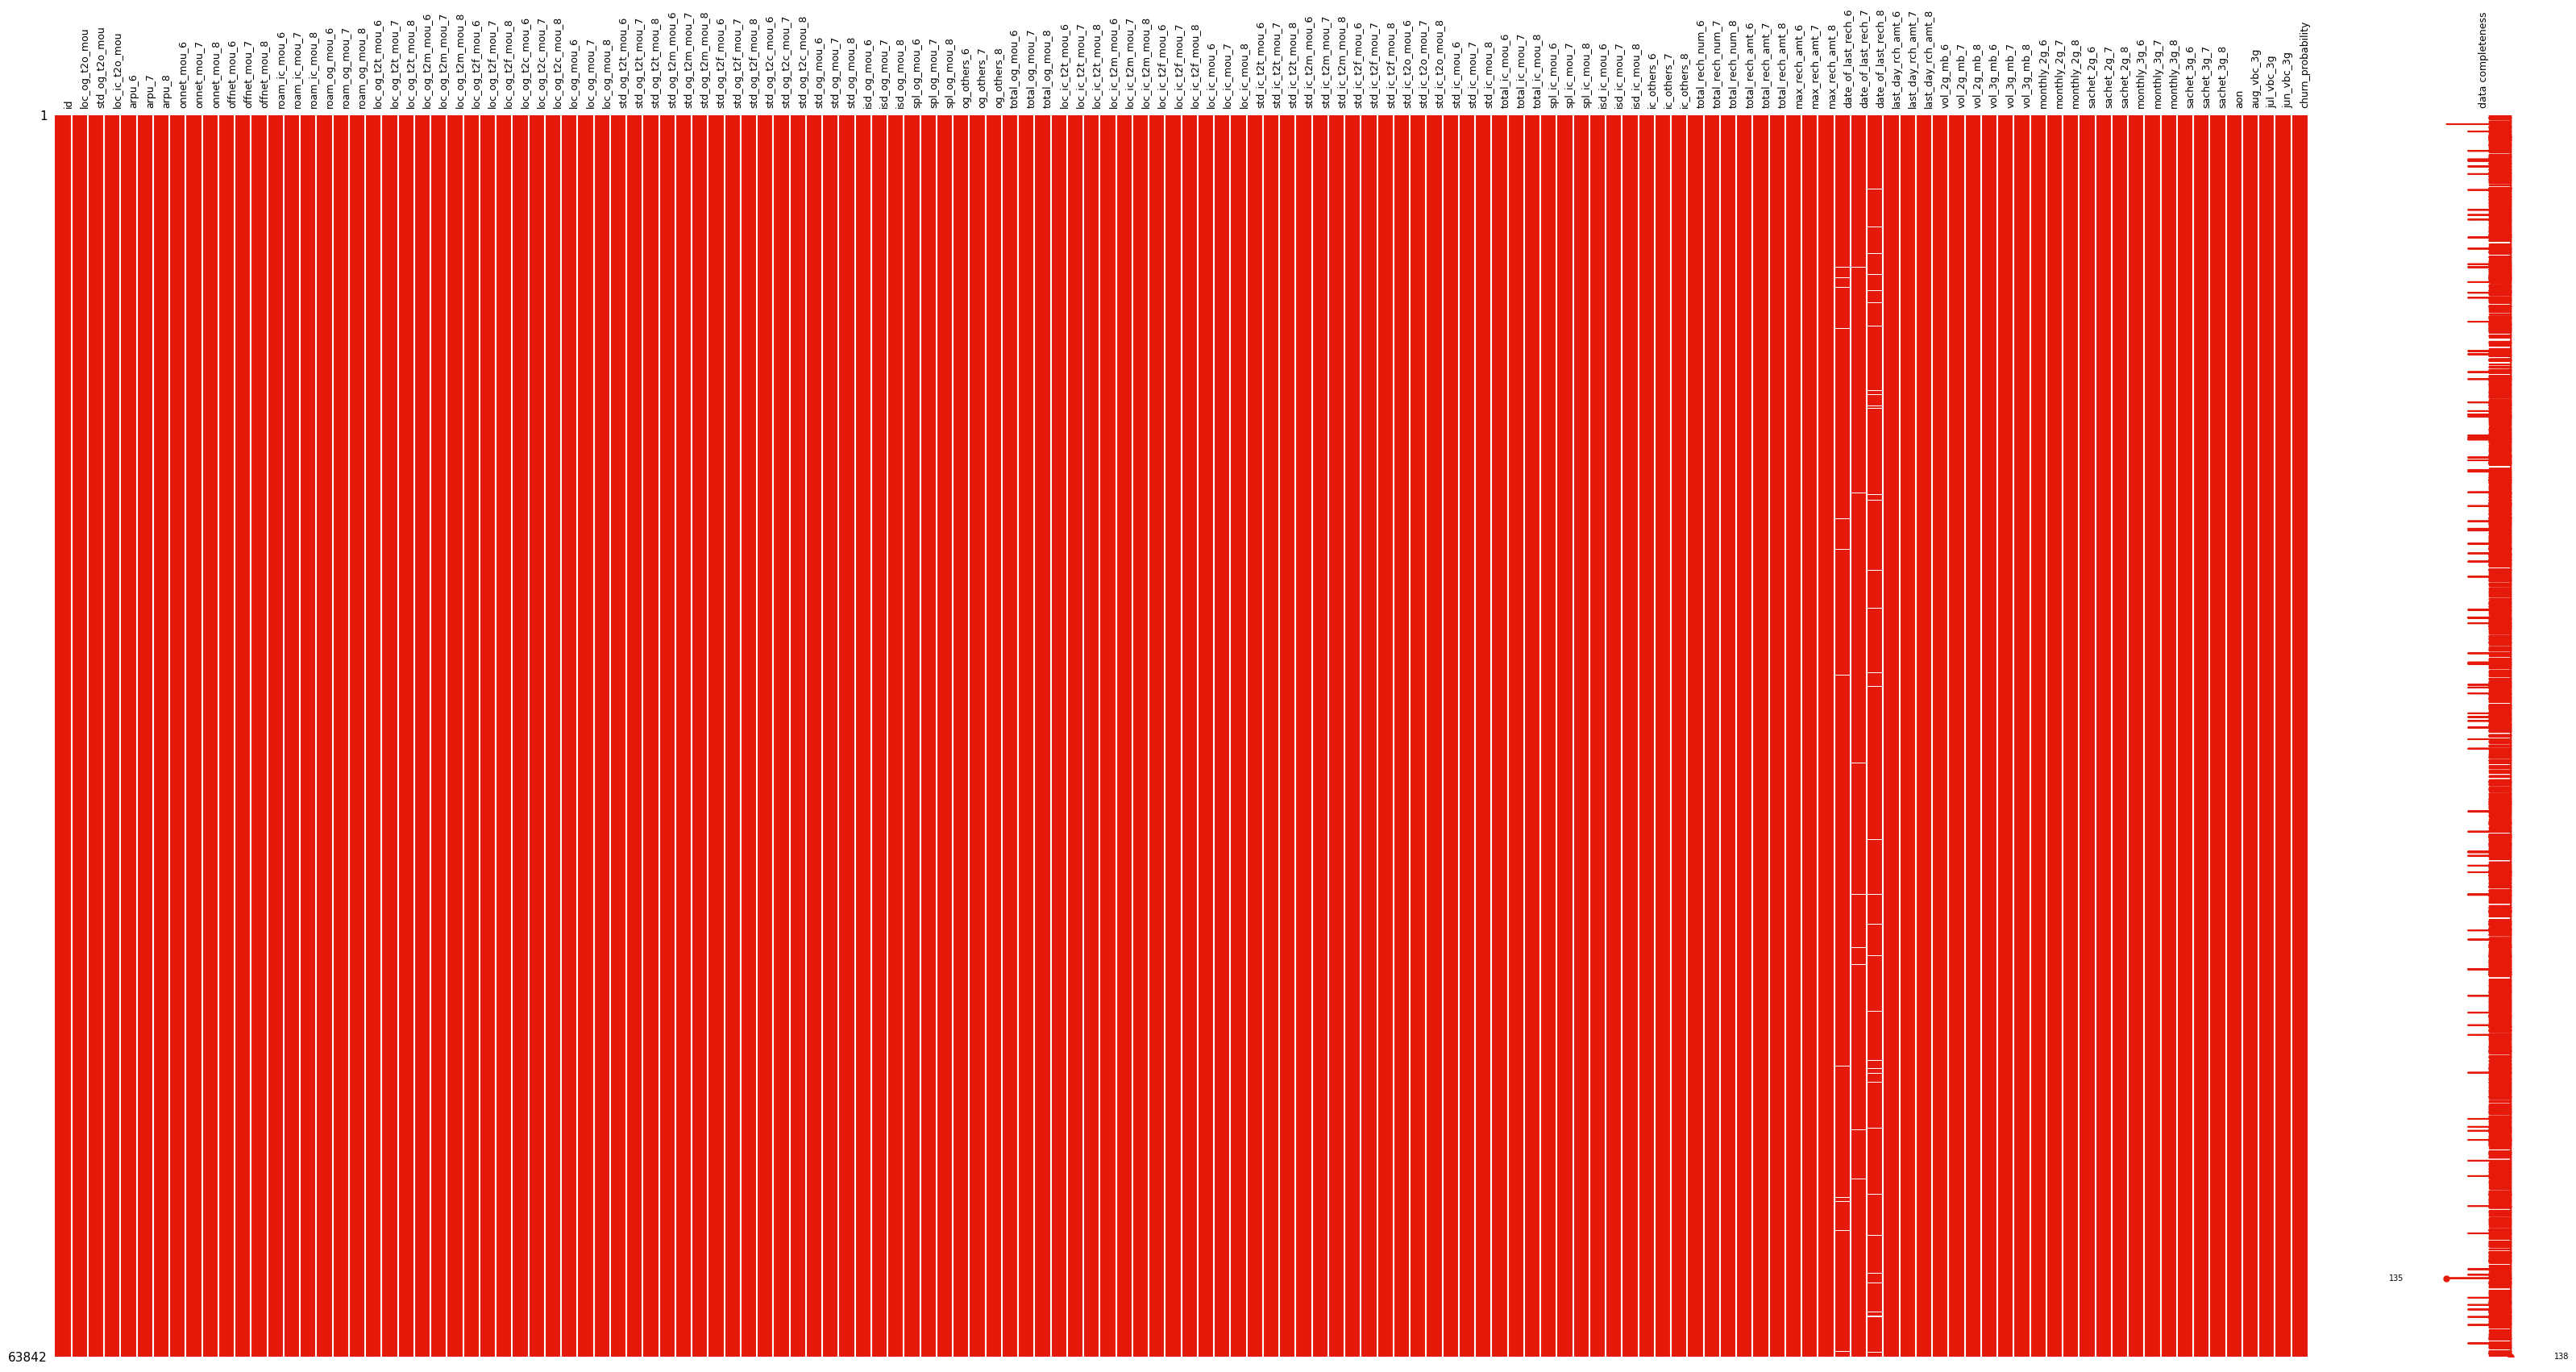

<Figure size 4000x2000 with 0 Axes>

In [39]:
# Let's use MSNO to minimise the missing values 
msno.matrix(db,figsize=(40,20),fontsize=9,color=(0.9, 0.1, 0.04),sparkline=True,labels=True,label_rotation=90)
plt. figure(figsize=(40,20))
plt.show()

In [40]:
# Using MICE to impute missing values
db_imp = IterativeImputer(estimator=BayesianRidge(),max_iter=10, random_state=0)
# Fitting the imputer for each index in date columns
for i in db_date_cols:
    db[i] = db_imp.fit_transform(db[i].values.reshape(-1,1))

In [41]:
#cross checking for removed missing values
pd.DataFrame((db.isnull().sum()/len(db)*100).sort_values(ascending=False))

0
id                   0.0
isd_ic_mou_6         0.0
total_ic_mou_6       0.0
total_ic_mou_7       0.0
total_ic_mou_8       0.0
spl_ic_mou_6         0.0
spl_ic_mou_7         0.0
spl_ic_mou_8         0.0
isd_ic_mou_7         0.0
total_rech_amt_6     0.0
isd_ic_mou_8         0.0
ic_others_6          0.0
ic_others_7          0.0
ic_others_8          0.0
total_rech_num_6     0.0
total_rech_num_7     0.0
std_ic_mou_8         0.0
std_ic_mou_7         0.0
std_ic_mou_6         0.0
std_ic_t2o_mou_8     0.0
std_ic_t2o_mou_7     0.0
std_ic_t2o_mou_6     0.0
std_ic_t2f_mou_8     0.0
std_ic_t2f_mou_7     0.0
std_ic_t2f_mou_6     0.0
std_ic_t2m_mou_8     0.0
std_ic_t2m_mou_7     0.0
std_ic_t2m_mou_6     0.0
std_ic_t2t_mou_8     0.0
std_ic_t2t_mou_7     0.0
std_ic_t2t_mou_6     0.0
loc_ic_mou_8         0.0
loc_ic_mou_7         0.0
total_rech_num_8     0.0
total_rech_amt_7     0.0
loc_og_t2o_mou       0.0
monthly_3g_8         0.0
monthly_2g_8         0.0
sachet_2g_6          0.0
sachet_2g_7          0.0
sachet_2g_8          0.0
monthly_3g_6         0.0
monthly_3g_7         0.0
sachet_3g_6          0.0
total_rech_amt_8     0.0
sachet_3g_7          0.0
sachet_3g_8          0.0
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0
jun_vbc_3g           0.0
monthly_2g_7         0.0
monthly_2g_6         0.0
vol_3g_mb_8          0.0
vol_3g_mb_7          0.0
vol_3g_mb_6          0.0
vol_2g_mb_8          0.0
vol_2g_mb_7          0.0
vol_2g_mb_6          0.0
last_day_rch_amt_8   0.0
last_day_rch_amt_7   0.0
last_day_rch_amt_6   0.0
date_of_last_rech_8  0.0
date_of_last_rech_7  0.0
date_of_last_rech_6  0.0
max_rech_amt_8       0.0
max_rech_amt_7       0.0
max_rech_amt_6       0.0
loc_ic_mou_6         0.0
loc_ic_t2f_mou_8     0.0
loc_ic_t2f_mou_7     0.0
loc_og_t2f_mou_6     0.0
loc_og_t2t_mou_6     0.0
loc_og_t2t_mou_7     0.0
loc_og_t2t_mou_8     0.0
loc_og_t2m_mou_6     0.0
loc_og_t2m_mou_7     0.0
loc_og_t2m_mou_8     0.0
loc_og_t2f_mou_7     0.0
loc_ic_t2f_mou_6     0.0
loc_og_t2f_mou_8     0.0
loc_og_t2c_mou_6     0.0
loc_og_t2c_mou_7     0.0
loc_og_t2c_mou_8     0.0
loc_og_mou_6         0.0
loc_og_mou_7         0.0
roam_og_mou_8        0.0
roam_og_mou_7        0.0
roam_og_mou_6        0.0
roam_ic_mou_8        0.0
roam_ic_mou_7        0.0
roam_ic_mou_6        0.0
offnet_mou_8         0.0
offnet_mou_7         0.0
offnet_mou_6         0.0
onnet_mou_8          0.0
onnet_mou_7          0.0
onnet_mou_6          0.0
arpu_8               0.0
arpu_7               0.0
arpu_6               0.0
loc_ic_t2o_mou       0.0
std_og_t2o_mou       0.0
loc_og_mou_8         0.0
std_og_t2t_mou_6     0.0
std_og_t2t_mou_7     0.0
spl_og_mou_6         0.0
loc_ic_t2m_mou_8     0.0
loc_ic_t2m_mou_7     0.0
loc_ic_t2m_mou_6     0.0
loc_ic_t2t_mou_8     0.0
loc_ic_t2t_mou_7     0.0
loc_ic_t2t_mou_6     0.0
total_og_mou_8       0.0
total_og_mou_7       0.0
total_og_mou_6       0.0
og_others_8          0.0
og_others_7          0.0
og_others_6          0.0
spl_og_mou_8         0.0
spl_og_mou_7         0.0
isd_og_mou_8         0.0
std_og_t2t_mou_8     0.0
isd_og_mou_7         0.0
isd_og_mou_6         0.0
std_og_mou_8         0.0
std_og_mou_7         0.0
std_og_mou_6         0.0
std_og_t2c_mou_8     0.0
std_og_t2c_mou_7     0.0
std_og_t2c_mou_6     0.0
std_og_t2f_mou_8     0.0
std_og_t2f_mou_7     0.0
std_og_t2f_mou_6     0.0
std_og_t2m_mou_8     0.0
std_og_t2m_mou_7     0.0
std_og_t2m_mou_6     0.0
churn_probability    0.0

All missing values have been addressed, and imputation has also been performed.

In [43]:
# Remove Columns with only one unique value
db = db.loc[:,db.nunique()!=1]
db.shape

(63842, 129)

In [44]:
db.describe()

id        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count  63842.000000  63842.000000  63842.000000  63842.000000  63842.000000   
mean   35007.995270    290.717910    291.918351    292.314734    132.461647   
std    20191.356709    331.281057    349.414630    355.546421    298.008091   
min        0.000000  -2258.709000  -1289.715000   -945.808000      0.000000   
25%    17541.250000    100.500500     98.146750     96.834000      7.650000   
50%    35032.500000    204.841000    204.512000    204.308500     34.285000   
75%    52478.750000    378.649500    379.769000    383.365500    118.737500   
max    69998.000000  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  63842.000000  63842.00000  63842.000000  63842.000000  63842.000000   
mean     136.413560    132.63037    198.832511    201.492158    196.500873   
std      313.774123    311.59425    315.252065    326.017934    323.360549   
min        0.000000      0.00000      0.000000      0.000000      0.000000   
25%        7.280000      6.59250     35.580000     34.390000     32.140000   
50%       33.530000     32.16000     97.050000     95.180000     92.180000   
75%      118.837500    114.38750    233.025000    232.837500    229.105000   
max     8157.780000  10752.56000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   63842.000000   63842.000000   63842.000000   63842.000000   
mean        9.621639       7.046054       7.021533      13.912921   
std        55.363613      56.139873      53.594527      72.932876   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2613.310000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   63842.000000   63842.000000      63842.000000      63842.000000   
mean        9.833203       9.716878         47.916809         47.956030   
std        59.296348      64.893821        152.203241        158.233696   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.860000          2.010000   
50%         0.000000       0.000000         12.430000         12.490000   
75%         0.000000       0.000000         41.930000         41.790000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      63842.000000      63842.000000      63842.000000      63842.000000   
mean          46.775476         94.908462         93.952513         93.094732   
std          156.191698        163.357203        156.104108        154.818473   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.780000         10.730000         11.610000         10.560000   
50%           12.260000         42.530000         42.740000         41.810000   
75%           41.140000        112.530000        112.080000        111.940000   
max        10752.560000       4696.830000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      63842.000000      63842.000000      63842.000000      63842.000000   
mean           3.828190          3.904767          3.730028          1.128410   
std           13.512334         13.801775         13.125739          5.807269   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%    

From the above it looks like we have negative revenues as well, which means those one are having high changes to churn.

##### Outlier Treatment

In [47]:
# Column list with id and target variable
db_list_convert = db.columns.to_list()
db_list_convert.remove('churn_probability')
db_list_convert.remove('id')

In [48]:
# Removing outlier using z-score method
db_zscore = np.abs(stats.zscore(db[db_list_convert]))
db = db[(db_zscore < 5).all(axis=1)]
db.shape

(48560, 129)

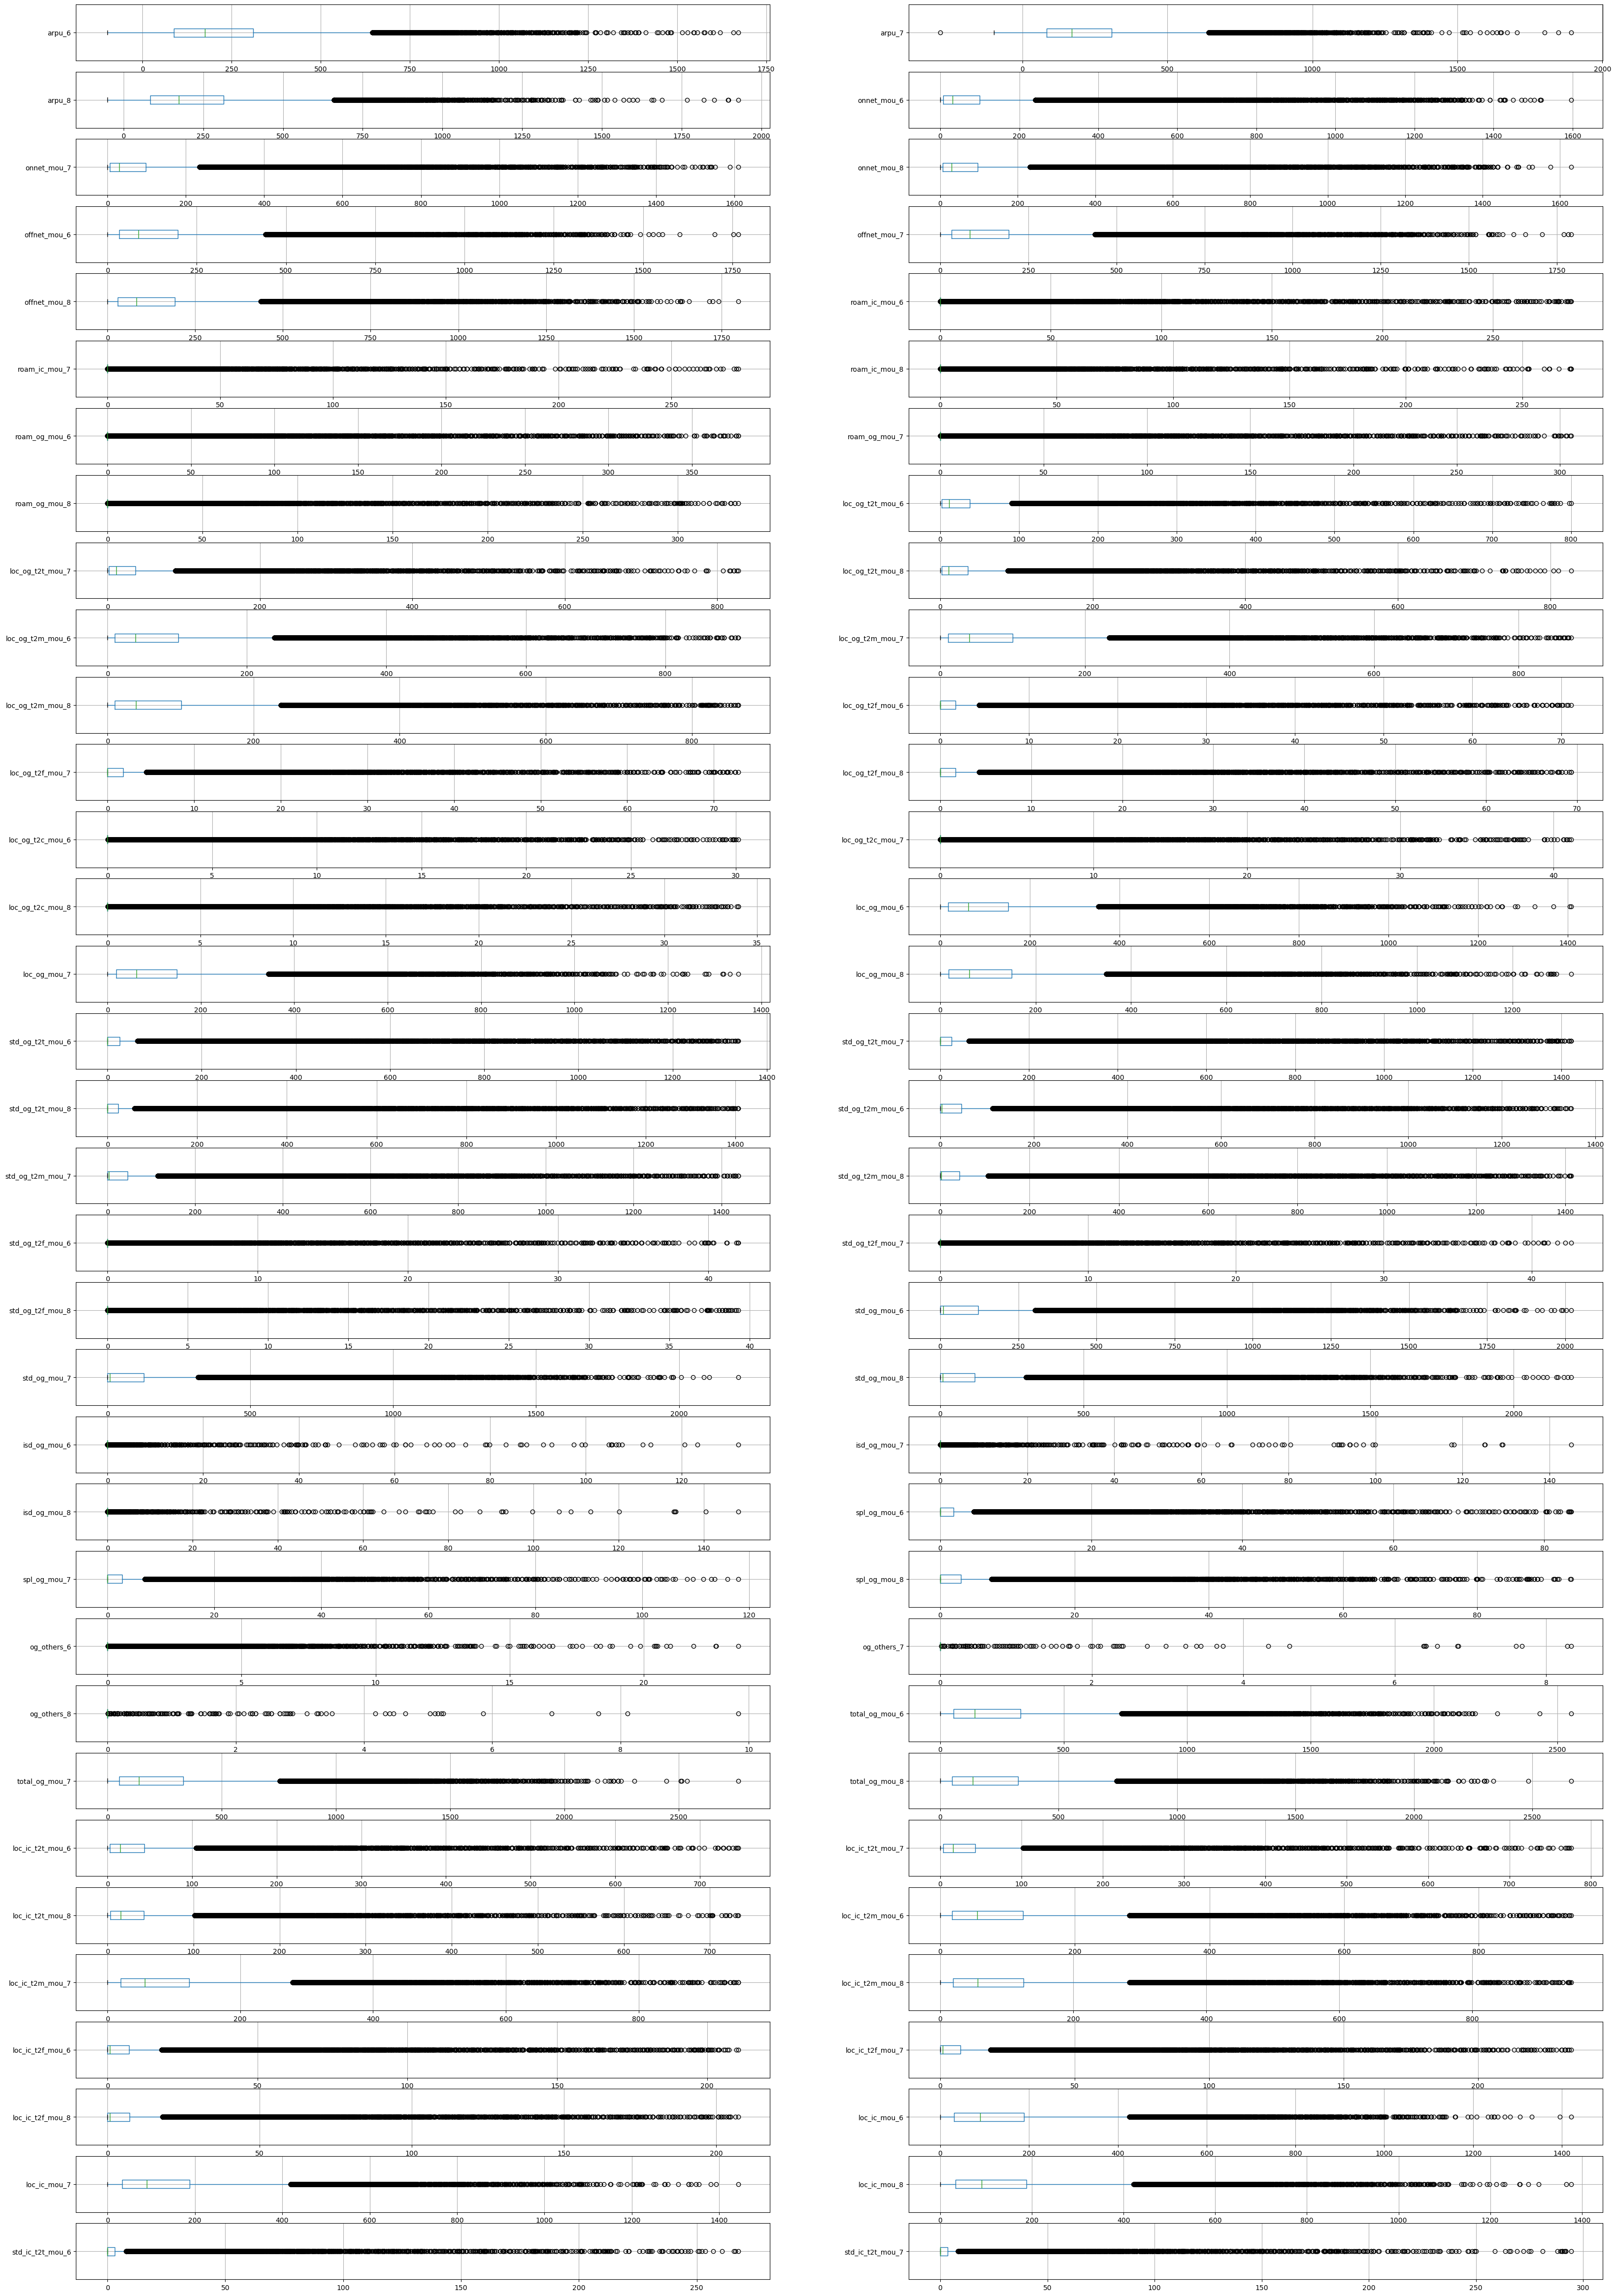

In [49]:
# Checking for outliers using boxplot in a 34 by 2 grid
fig, ax = plt.subplots(34, 2, figsize=(40, 60))
for variable, subplot in zip(db_list_convert, ax.flatten()):
    db.boxplot(column=variable, ax=subplot, vert=False)
plt.show()

Due to numerous outliers, we chose the z-score method over IQR to avoid data loss. For churn prediction, it's better to use a model robust to outliers.

### Step 4 - Exploratory Data Analysis

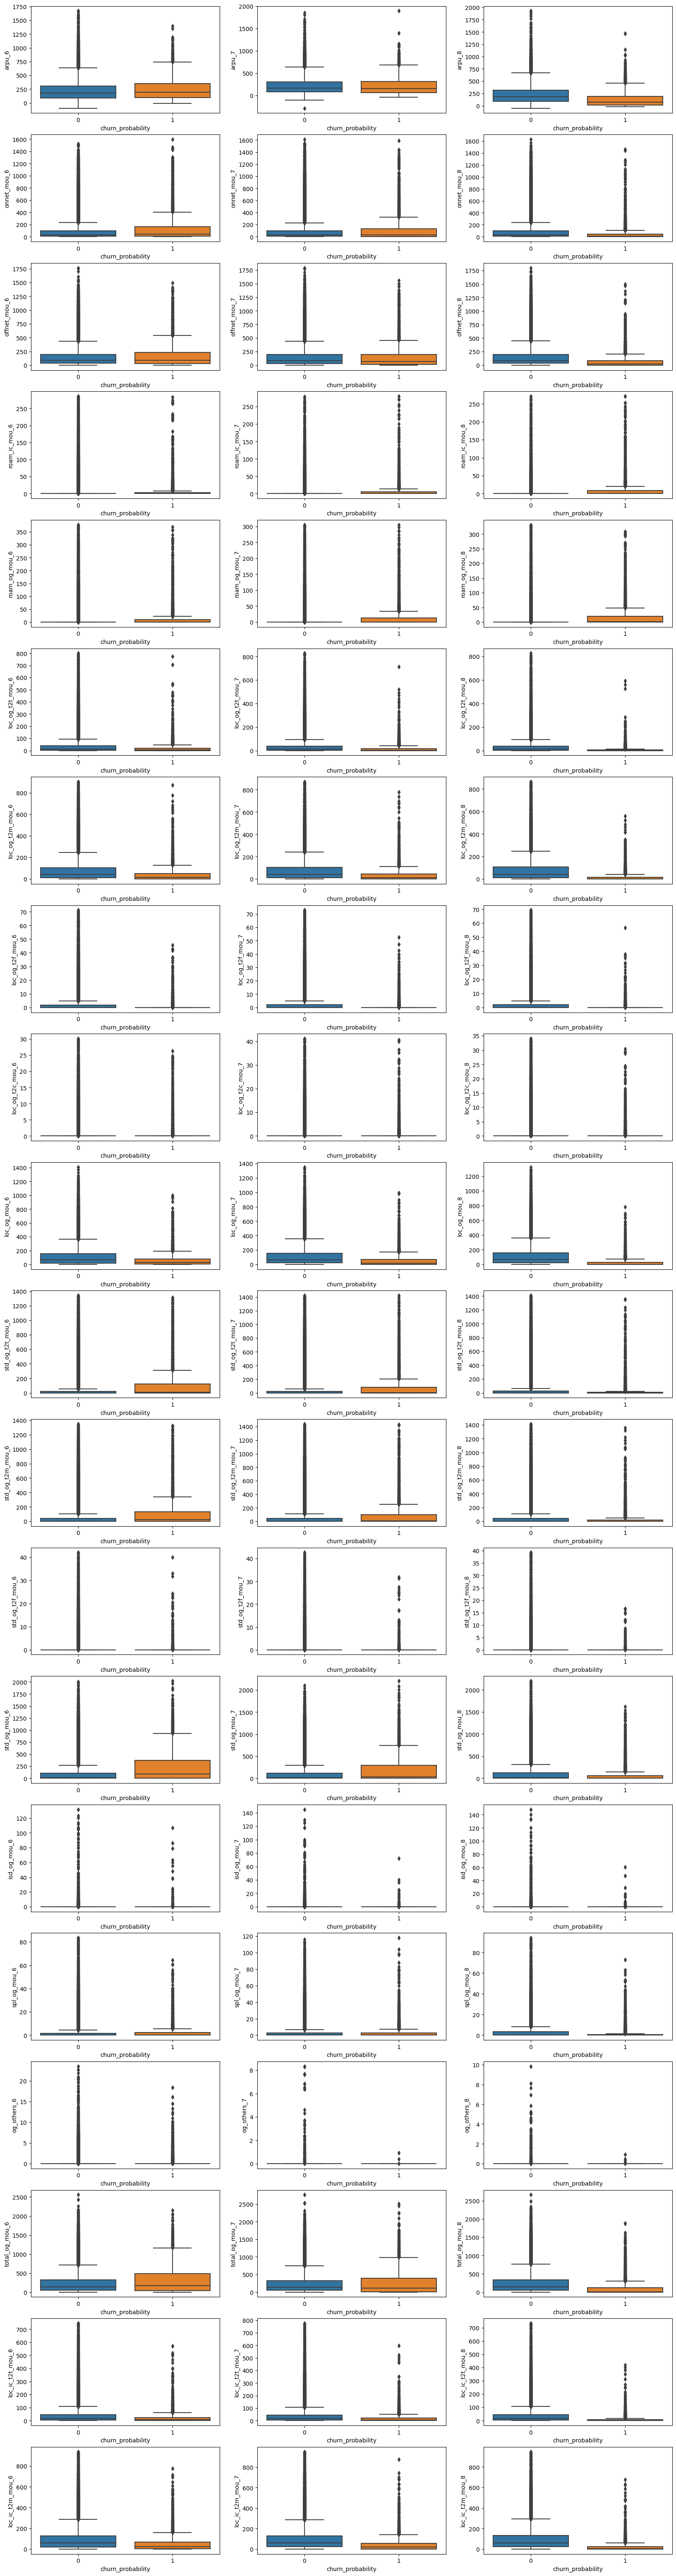

In [52]:
# Bivariate analysis of churn probability with other variables
# Plotting the box plot to understand the relations
fig, ax = plt.subplots(20, 3, figsize=(20, 80))
for variable, subplot in zip(db_list_convert, ax.flatten()):
    sns.boxplot(x='churn_probability', y=variable, data=db, ax=subplot)


From these various box plots, we can interpret many things. For example, the first row features show that the median value for churn probability 1 appears to be higher than for churn probability 0, indicating that users with higher values of these features might be more likely to churn. Likewise, each box plot tells various things. Additionally, there are numerous outliers in the data. These outliers might contain important information.

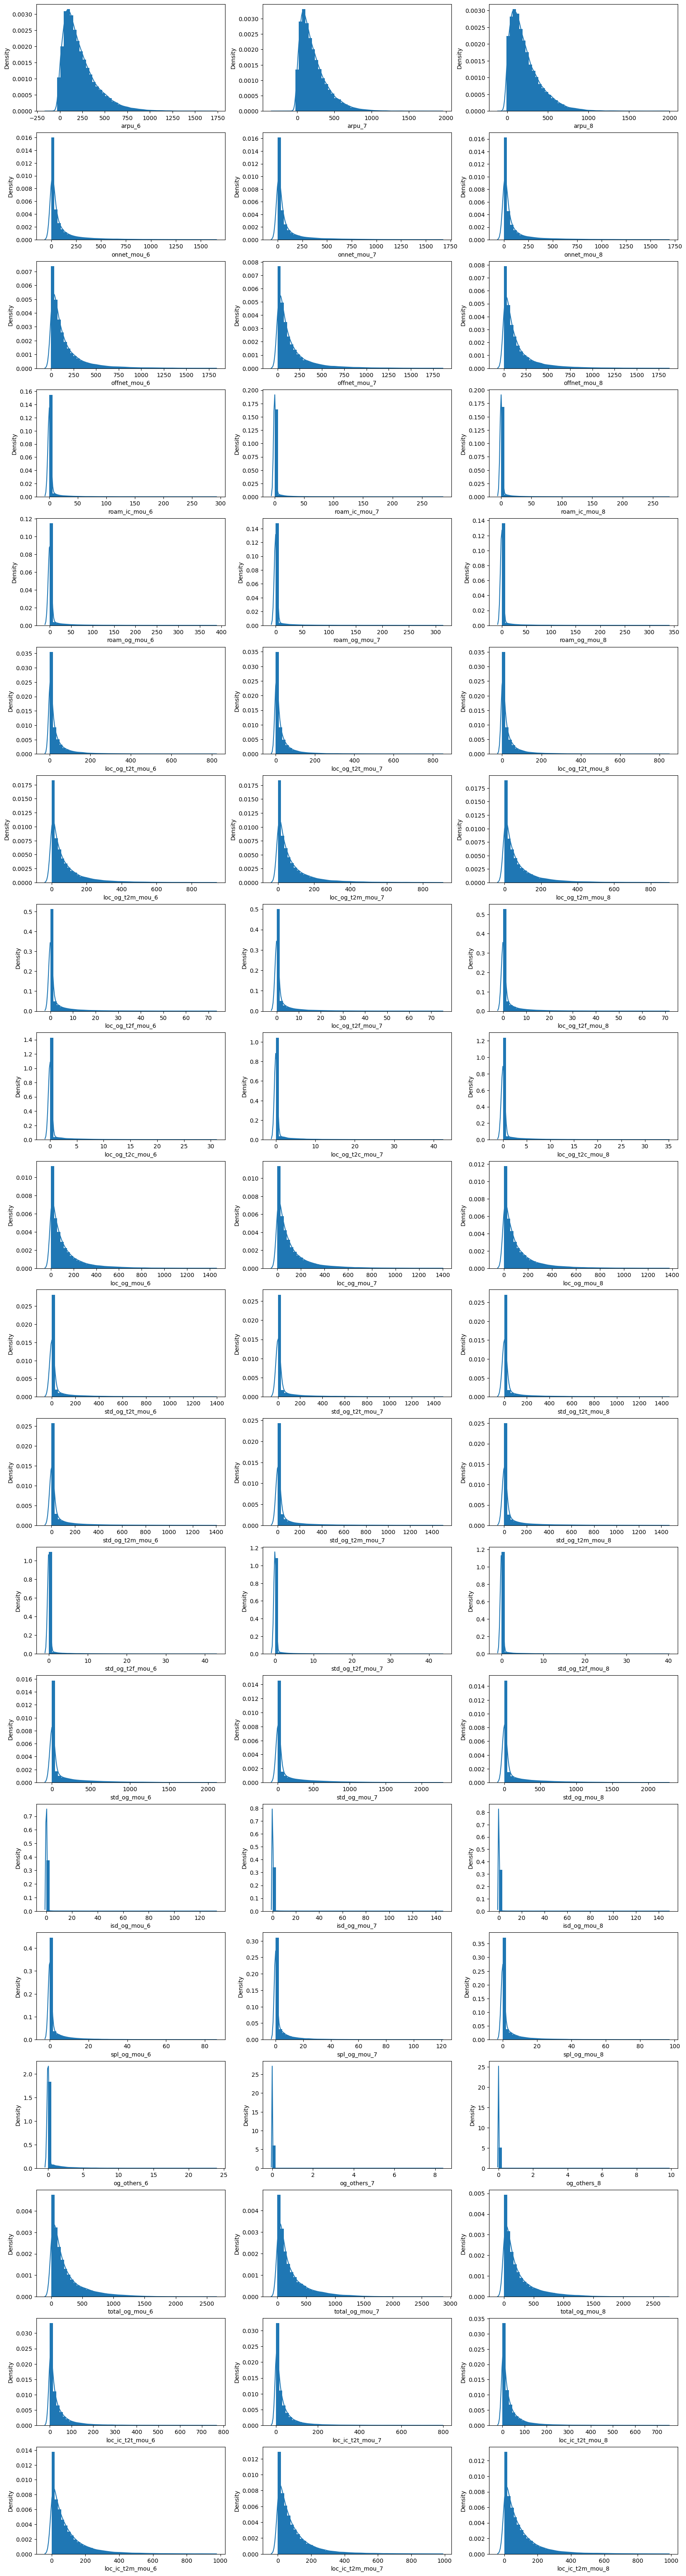

In [54]:
# Univariate analysis of churn probability with other variables
# Checking for distribution using distplot in a 20 by 3 grid
fig, ax = plt.subplots(20, 3, figsize=(20, 80))
for variable, subplot in zip(db_list_convert, ax.flatten()):
    sns.distplot(db[variable], ax=subplot,kde=True, bins=50, hist_kws={'alpha': 1})


From these graphs we can analyze few things like : <br>
High Usage Features:<br>
Features like "avg_u_c", "avg_ic_mou_0", "avg_ic_mou_6", etc., show a significant number of users with low usage and a long tail of high usage.<br>
Low Usage Features:<br>
Features such as "vol_2g_2", "vol_3g_2", etc., show a small number of users with very high values.<br>
Also, features with a wide range and significant outliers, such as "loc_ic_mou_6", "std_ic_t2t_mou_8", etc., suggest that users with unusual usage patterns might be more likely to churn.<br>

<Axes: >

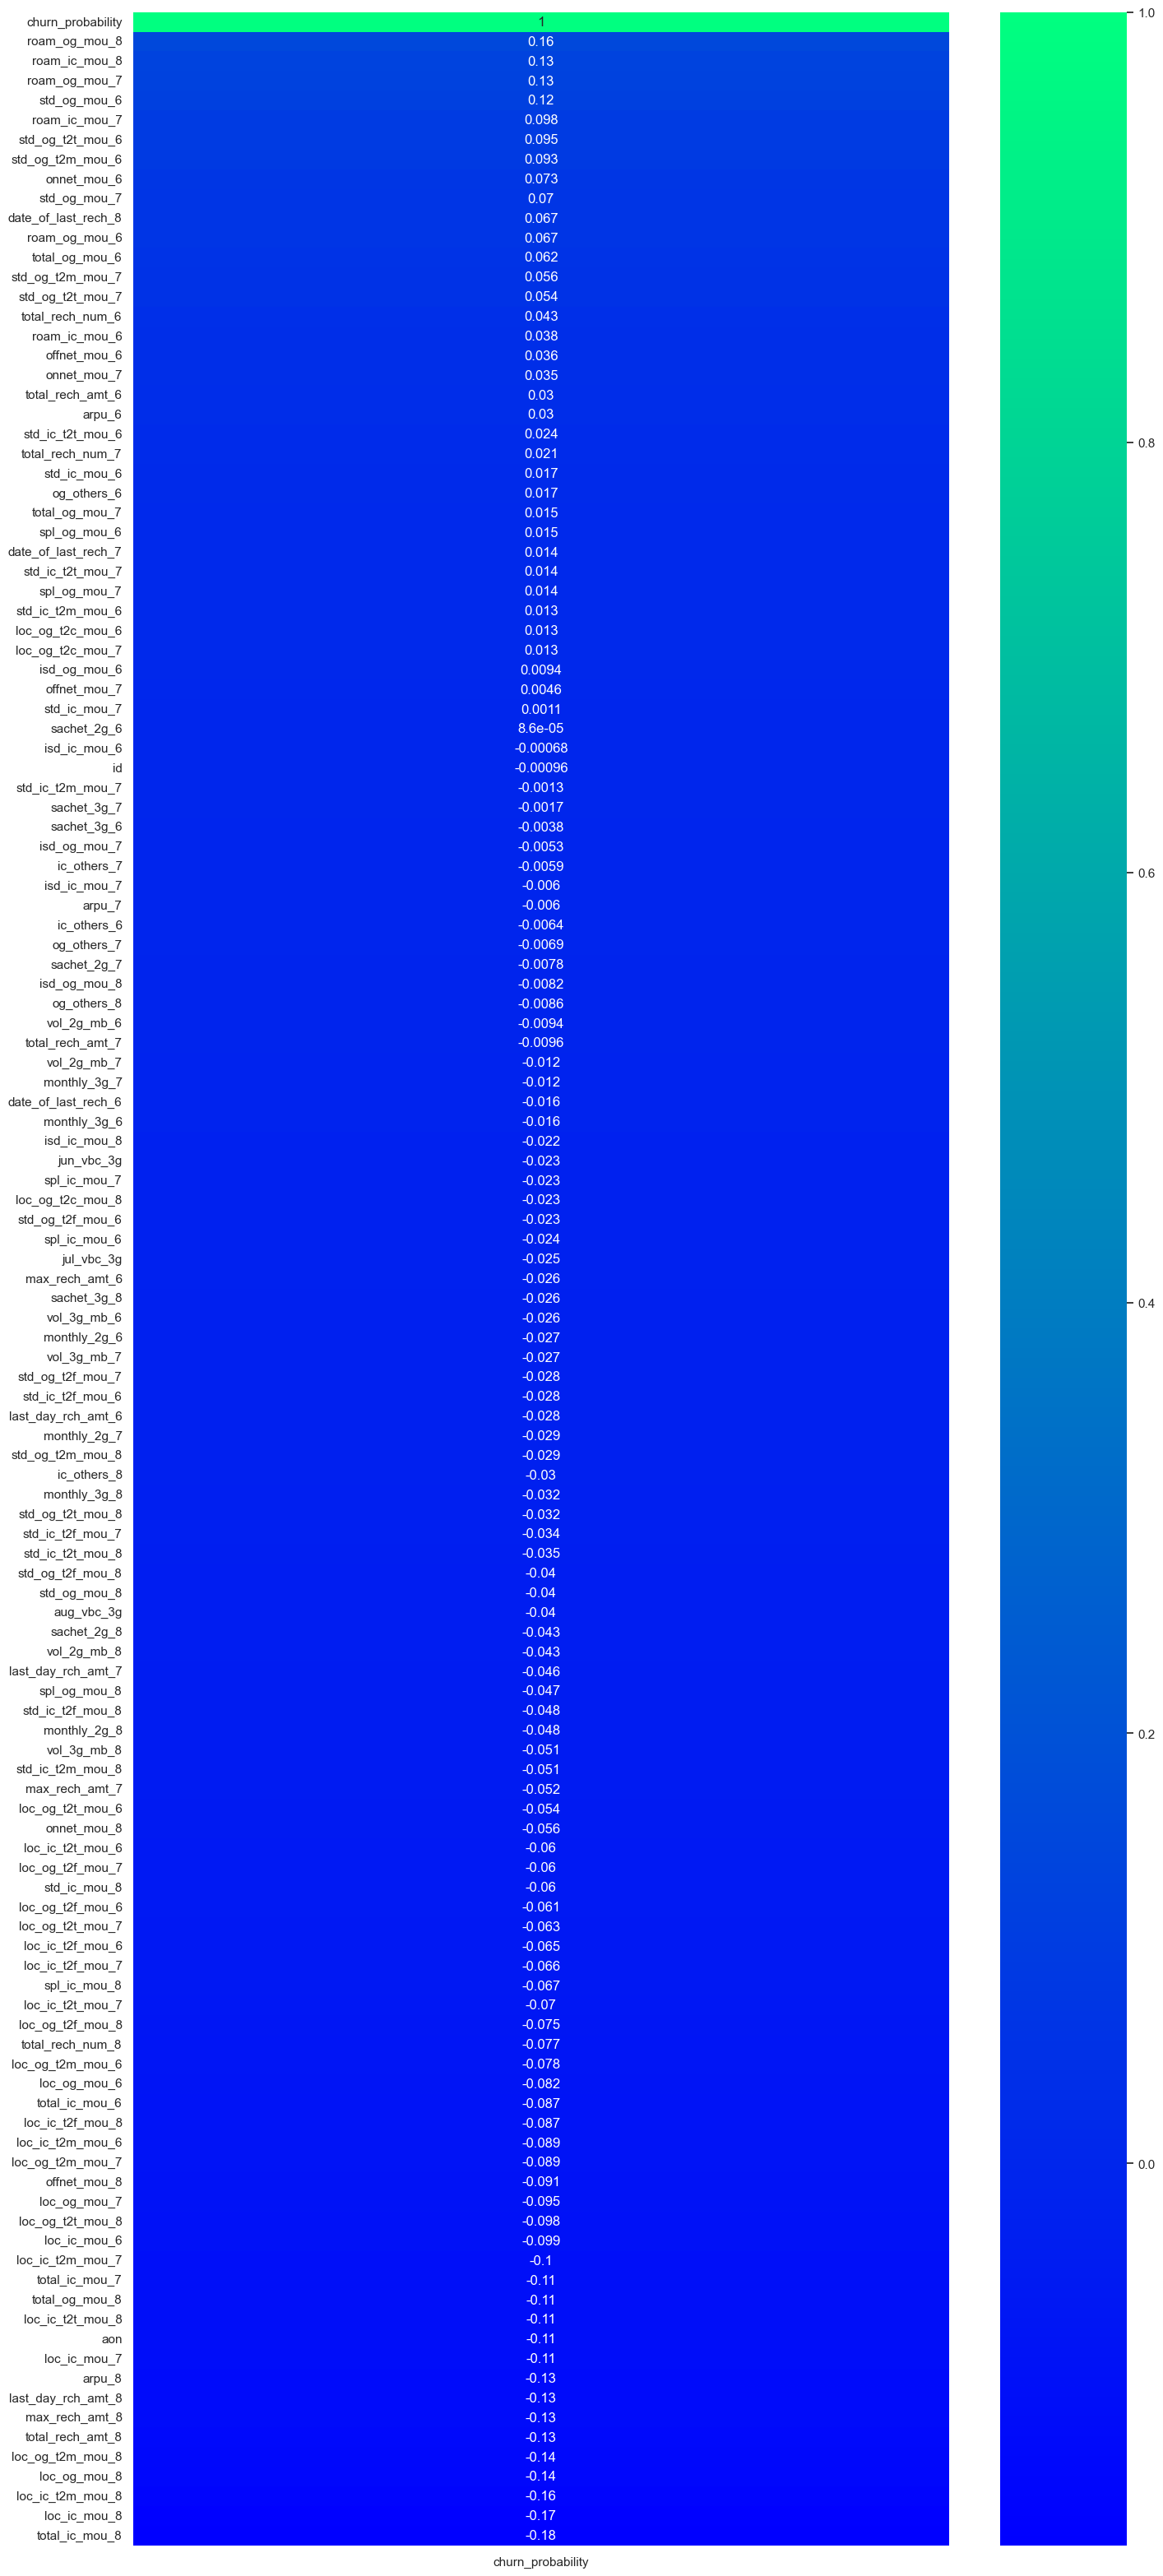

In [56]:
# Univariate analysis of churn probability with other variables
# Heatmap with target variable
tel_churn_pred = db.copy()
width = 16
height = 40
sns.set(rc = {'figure.figsize':(width,height)})
sns.heatmap(tel_churn_pred.corr()[['churn_probability']].sort_values(by='churn_probability',ascending=False),cmap='winter',annot=True)


From this heatmap we can analyze and tell the features at the top of the list, such as roam_og_mou_8 (0.16), roam_ic_mou_8 (0.13), roam_og_mou_7 (0.13), and std_og_mou_6 (0.12) show the highest positive correlation with churn probability.<br>
This indicates that higher values of these features are associated with an increased likelihood of churn.<br>
Also, Features at the bottom of the list, such as loc_ic_mou_6 (-0.18), total_ic_mou_6 (-0.17), loc_ic_mou_8 (-0.16), loc_ic_t2m_mou_8 (-0.14), and roam_ic_mou_8 (-0.14) show the highest negative correlation with churn probability.<br>
This indicates that higher values of these features are associated with a decreased likelihood of churn. 

### Step 5 - Feature engineering 

Derive new Features

In [60]:
# Average recharge amount for June and July
#db['avg_rech_amt_6_7']=((db['total_rech_amt_6']+db['total_rech_amt_7'])/2)

In [61]:
# Average 3g usage for June and July
#db['avg_3g_6_7']=((db['vol_3g_mb_6']+db['vol_3g_mb_7'])/2)

These new features were derived and used in the model building, but they didn't improve the model's performance, so we are not going to use them.

Dropping date columns since they are not in use

In [64]:

# since they are not usage related columns and can't be used for modelling 
date_columns = db.filter(regex='^date.*').columns
db.drop(columns=date_columns, inplace=True)
# db.drop(['id'],axis=1,inplace=True)

In [65]:
# Check for columns containing 'date' in their name
date_columns = [col for col in db.columns if 'date' in col.lower()]

# Print the list of columns containing 'date'
print("Columns containing 'date':", date_columns)

Columns containing 'date': []


Dropped all date columns.

In [67]:
db.shape

(48560, 126)

### Step 6 - Create X, y and then Train test split

In [69]:
y = db.pop('churn_probability') # Predicted / Target Variable
X = db # Predictor variables

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [71]:
# class imbalance

y.value_counts(normalize=True).to_frame()

proportion
churn_probability            
0                    0.939065
1                    0.060935

In [72]:
# Ratio of classes 
db_class_ratio_0 = y[y == 0].count()
db_class_ratio_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(db_class_ratio_1/db_class_ratio_0,3)}')

Class Imbalance Ratio : 0.065


### Step 7 - Smote analysis and Scaling

##### Let's use SMOTE To account for class imbalance 

In [75]:
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance
X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)

X_train_resampled.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   1712  273.520  287.503  292.575       504.08       653.43       649.06   
1  11370  188.516  226.896   62.383        49.26        49.14        17.61   
2  40444    9.086    0.000  115.238         1.51         0.00         0.00   
3  28862    3.500  495.994  560.511         0.00       567.51       686.86   
4  66555  551.403  315.655  133.876        40.09        15.94         0.00   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         10.04          7.01          4.68           0.00           0.00   
1         52.33         58.44         20.28           0.00          22.31   
2          0.00          0.00         65.26           0.00           0.00   
3          0.38        149.83        363.58           3.48           0.00   
4        245.41        129.11          0.00           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1          14.09           0.00          88.61          19.33   
2           0.00           0.00           0.00           0.00   
3           0.00           3.34           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.34              0.00              0.00              2.48   
1             28.89              6.74              2.76             49.99   
2              1.51              0.00              0.00              0.00   
3              0.00             14.78            132.76              0.00   
4             29.88              7.36              0.00            230.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00               0.0   
1              9.44             12.03              0.48               0.0   
2              0.00             51.33              0.00               0.0   
3             38.79            266.61              0.00               0.0   
4            128.38              0.00              0.96               0.0   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.0              7.56              2.26               0.0   
1               0.0              0.00              2.30               0.0   
2               0.0              0.00              0.00               0.0   
3               0.0              0.00              0.00               0.0   
4               0.0              0.00              0.00               0.0   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          4.83          0.00          0.00            501.73   
1         79.38         16.19         14.79             20.36   
2          1.51          0.00         51.33              0.00   
3          0.00         53.58        399.38              0.00   
4        261.59        135.74          0.00             10.21   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            653.43            649.06              0.00              2.46   
1              1.00              3.76              1.84              1.78   
2              0.00              0.00              0.00              0.00   
3            552.73            554.09              0.00            111.03   
4              8.58              0.00             13.69              0.73   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              4.68               0.0               0.0               0.0   
1              0.00               0.0               0.0               0.0   
2             13.93               0.0               0.0               0.0   
3             94.86               0.0               0.0               0.0   
4              0.00               0.0               0.0

##### Standardizing (scaling)

In [77]:
# columns with numerical data
db_int_condition = db.dtypes == 'int64'
db_float_condition = db.dtypes == 'float64'
numerical_vars = db.columns[db_int_condition | db_float_condition].to_list()

In [78]:
scaler = StandardScaler() 

# Fit and transform train set 
X_train_resampled[numerical_vars] = scaler.fit_transform(X_train_resampled[numerical_vars])


In [79]:
# summary statistics of standardized variables
round(X_train_resampled.describe(),2)

id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
count  73006.00  73006.00  73006.00  73006.00     73006.00     73006.00   
mean       0.00     -0.00      0.00      0.00        -0.00         0.00   
std        1.00      1.00      1.00      1.00         1.00         1.00   
min       -1.73     -1.79     -2.71     -1.26        -0.59        -0.56   
25%       -0.87     -0.73     -0.73     -0.73        -0.54        -0.52   
50%       -0.01     -0.27     -0.28     -0.30        -0.40        -0.39   
75%        0.87      0.48      0.46      0.41         0.04         0.01   
max        1.74      7.92      9.27      9.97         7.69         8.10   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count     73006.00      73006.00      73006.00      73006.00       73006.00   
mean         -0.00          0.00          0.00          0.00          -0.00   
std           1.00          1.00          1.00          1.00           1.00   
min          -0.48         -0.80         -0.74         -0.66          -0.31   
25%          -0.46         -0.62         -0.60         -0.58          -0.31   
50%          -0.36         -0.36         -0.37         -0.37          -0.31   
75%          -0.05          0.20          0.17          0.13          -0.20   
max           9.85          7.90          8.17          9.24          13.27   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count       73006.00       73006.00       73006.00       73006.00   
mean           -0.00           0.00          -0.00          -0.00   
std             1.00           1.00           1.00           1.00   
min            -0.31          -0.33          -0.36          -0.37   
25%            -0.31          -0.33          -0.36          -0.37   
50%            -0.31          -0.33          -0.36          -0.37   
75%            -0.18          -0.14          -0.19          -0.18   
max            15.17          13.14          10.84          11.05   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count       73006.00          73006.00          73006.00          73006.00   
mean            0.00             -0.00             -0.00              0.00   
std             1.00              1.00              1.00              1.00   
min            -0.40             -0.49             -0.48             -0.41   
25%            -0.40             -0.46             -0.46             -0.41   
50%            -0.40             -0.33             -0.34             -0.34   
75%            -0.11              0.02              0.02             -0.03   
max            11.00             13.99             15.20             15.73   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count          73006.00          73006.00          73006.00          73006.00   
mean               0.00             -0.00              0.00              0.00   
std                1.00              1.00              1.00              1.00   
min               -0.67             -0.65             -0.57             -0.33   
25%               -0.58             -0.58             -0.55             -0.33   
50%               -0.35             -0.37             -0.40             -0.33   
75%                0.15              0.14              0.09             -0.17   
max                9.33              9.12              9.41             12.85   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count          73006.00          73006.00          73006.00          73006.00   
mean              -0.00              0.00              0.00             -0.00   
std                1.00              1.00              1.00              1.00   
min               -0.34             -0.31             -0.31             -0.31   
25%               -0.34             -0.31             -0.31             -0.31   
50%               -0.34             -0.31             -0.31             -0.31   
75%

### Step 8 - Model building

#### Model 1 : Interpretable Model : Logistic Regressionabs

In [82]:

#Baseline Logistic Regression Model
baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [83]:
# Baseline Performanceabs
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [84]:
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)



Confusion Matrix for train:
 [[28851  7652]
 [  475  1870]]

Confusion Matrix for test: 
 [[7141 1957]
 [ 137  477]]


In [85]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.791
Sensitivity / True Positive Rate / Recall : 0.797
Precision / Positive Predictive Value : 0.196
F1-score : 0.315


Test Performance : 

Accuracy : 0.784
Sensitivity / True Positive Rate / Recall : 0.777
Precision / Positive Predictive Value : 0.196
F1-score : 0.313


In [86]:
# Get the coefficients and corresponding feature names
coefficients = baseline_model.coef_[0]
feature_names = X_train.columns

# Create a dictionary mapping feature names to their coefficients
feature_coefficients = dict(zip(feature_names, coefficients))

# Sort the dictionary by coefficient values (absolute values for better visualization)
sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the feature names and their corresponding coefficients
for feature, coefficient in sorted_feature_coefficients:
    print(feature, ':', coefficient)

roam_og_mou_8 : 0.006111356705246062
last_day_rch_amt_8 : -0.0057272063675876395
loc_ic_mou_8 : -0.005102317188752742
total_ic_mou_8 : -0.0046477493719565485
roam_og_mou_7 : 0.003563853335178594
roam_ic_mou_8 : 0.0033232139690058775
roam_og_mou_6 : 0.0032278331712735906
vol_2g_mb_8 : -0.0028658770355089722
total_og_mou_8 : -0.002833368035920184
loc_ic_t2m_mou_8 : -0.0027369823085551075
roam_ic_mou_7 : 0.0024214372532513602
arpu_8 : 0.002387576202377196
loc_og_mou_8 : -0.00213422244626508
total_ic_mou_7 : 0.0019846966515849056
onnet_mou_7 : 0.0019006289440315859
offnet_mou_8 : 0.001759153632456335
vol_3g_mb_8 : -0.0017249074861104689
roam_ic_mou_6 : 0.0015892378332784955
loc_ic_t2t_mou_8 : -0.0015720782136204583
offnet_mou_7 : 0.0015371069298472542
onnet_mou_8 : 0.0014439374994608023
onnet_mou_6 : 0.0013365833182615746
loc_og_t2m_mou_8 : -0.0013144023252999952
max_rech_amt_6 : 0.0011881966608449424
offnet_mou_6 : 0.0011512144094866325
max_rech_amt_7 : -0.0011187592092956847
total_rech_a

In [87]:
# Get the absolute coefficients and corresponding feature names
abs_coefficients = np.abs(baseline_model.coef_[0])
feature_names = X_train.columns

# Create a dictionary mapping feature names to their absolute coefficients
feature_abs_coefficients = dict(zip(feature_names, abs_coefficients))

# Sort the dictionary by absolute coefficient values in descending order
sorted_feature_abs_coefficients = sorted(feature_abs_coefficients.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 features with highest absolute coefficients
print("Top 20 features contributing to churn prediction:")
for feature, abs_coefficient in sorted_feature_abs_coefficients[:20]:
    print(feature)

Top 20 features contributing to churn prediction:
roam_og_mou_8
last_day_rch_amt_8
loc_ic_mou_8
total_ic_mou_8
roam_og_mou_7
roam_ic_mou_8
roam_og_mou_6
vol_2g_mb_8
total_og_mou_8
loc_ic_t2m_mou_8
roam_ic_mou_7
arpu_8
loc_og_mou_8
total_ic_mou_7
onnet_mou_7
offnet_mou_8
vol_3g_mb_8
roam_ic_mou_6
loc_ic_t2t_mou_8
offnet_mou_7


These are the top 20 features which are strong predictors for churn.

#### PCA 

In [90]:
pca = PCA(random_state = 42) 
# note that pca is fit on original train set instead of resampled train set.
pca.fit(X_train)  
pca.components_

array([[ 9.99999944e-01,  2.24438329e-05,  7.64265080e-05, ...,
         4.67117623e-05,  1.66022429e-05,  9.64777421e-06],
       [ 1.82428547e-04,  7.81271435e-04, -2.64414538e-03, ...,
         5.39053122e-03,  3.89763739e-03,  3.42450783e-03],
       [-1.71272148e-04,  1.70131339e-01,  1.89446296e-01, ...,
         1.20665409e-03,  6.32345477e-04,  1.63119738e-04],
       ...,
       [-2.62045734e-10, -1.11811279e-08,  5.55923775e-07, ...,
        -1.68044973e-07,  1.48271072e-07, -9.82253323e-08],
       [ 5.06183034e-10, -3.04221341e-07, -3.15927555e-07, ...,
         5.15821386e-09, -3.75852500e-08,  4.65853936e-08],
       [-1.34052546e-09, -1.88033547e-08,  7.07237658e-07, ...,
         1.41627970e-07, -1.92223933e-07,  1.86177157e-07]])

In [91]:
pca.explained_variance_ratio_

array([9.93639739e-01, 2.33014795e-03, 1.60387723e-03, 5.39553523e-04,
       3.09433641e-04, 2.91432269e-04, 2.59606346e-04, 1.56257779e-04,
       1.46586784e-04, 8.25132783e-05, 6.15842125e-05, 5.30444025e-05,
       5.05521247e-05, 4.41149214e-05, 4.19169806e-05, 3.74442212e-05,
       3.31257589e-05, 3.10460000e-05, 2.95887321e-05, 2.50679990e-05,
       2.33721495e-05, 2.18877755e-05, 2.00070777e-05, 1.79822988e-05,
       1.50784786e-05, 1.42730037e-05, 1.22077540e-05, 1.18733372e-05,
       1.00307261e-05, 8.74801185e-06, 7.53625203e-06, 7.23569627e-06,
       5.70452584e-06, 5.33905081e-06, 4.61898397e-06, 4.22170143e-06,
       4.03511114e-06, 3.72938863e-06, 3.26829079e-06, 3.23090420e-06,
       3.09519745e-06, 2.97975377e-06, 2.93020044e-06, 2.65245499e-06,
       2.54488849e-06, 2.50786277e-06, 1.94689461e-06, 1.88633224e-06,
       1.85606165e-06, 1.07377059e-06, 5.42187928e-07, 5.24896195e-07,
       4.67563886e-07, 4.55305373e-07, 4.10573824e-07, 3.94618290e-07,
      

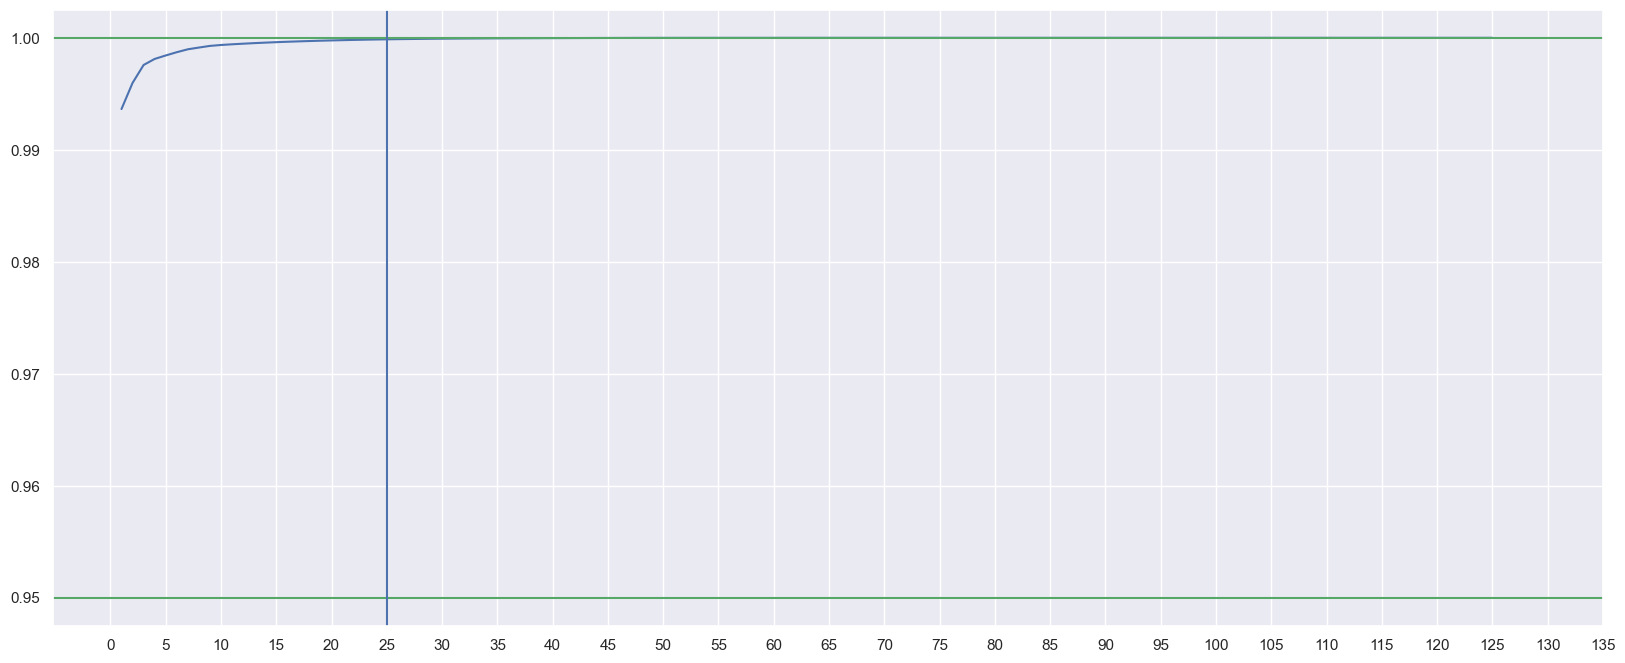

In [92]:
# let plot a scree graph 

var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(x=np.arange(1, len(var_cum) + 1), y=var_cum)

plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='g')
plt.axhline(1.0,color='g')
plt.axvline(25,color='b')



In [93]:
# Perform PCA using the first 25 components
pca_final = PCA(n_components=25, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,26)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head(10)

PC_1         PC_2         PC_3         PC_4         PC_5  \
1712  -33275.321760  -502.641481   957.993396 -1062.696899    64.382291   
11370 -23618.182576  2247.720290  -394.664321  -590.955217  -148.710540   
40444   5456.104866   153.161639  -783.874627  -338.438922    92.702557   
28862  -6125.275090  -879.241484   989.058071  -358.965007  1194.116824   
66555  31567.471512  -720.773779  -234.292163   373.318524  -251.922279   
4169  -30818.793982  -239.836657  -539.767544   251.496981    63.002988   
51848  16860.367340  1748.017700  2824.192051  -794.932150  1434.549054   
30216  -4771.743175  -712.389273  -748.495426  -173.847325  -142.988263   
45202  10214.331306 -1021.133229  -835.728437   -16.099527    49.411193   
27596  -7391.668211  -680.185098  -449.208661   119.119072    11.560089   

             PC_6        PC_7        PC_8        PC_9       PC_10       PC_11  \
1712   210.291467 -893.469969  -28.827882  -48.387525  -75.961546  -35.817422   
11370   77.106839   81.177600   20.973966 -117.494917   86.493143  -76.005485   
40444  -83.973208   46.454970   80.380423   17.751800  -72.855390   53.805865   
28862 -269.308937 -571.304462 -188.852674 -251.699529 -106.824951  -54.860892   
66555  811.328828  198.027613  225.585634 -203.867370  297.346498  523.922017   
4169  -245.995545 -133.007733 -221.860584  365.468236   98.559868   25.274952   
51848 -512.157504  989.344097 -308.404972   47.046262  -43.288450  -94.567671   
30216  -80.906943   79.065460   -7.345010   38.245453  -65.461577   -2.483967   
45202 -132.191591  -53.628728  -52.797570  -45.076475  -69.318449   22.303101   
27596  -71.590034   51.392824   88.624794 -235.985565  108.982183    8.690638   

            PC_12       PC_13       PC_14       PC_15       PC_16       PC_17  \
1712    48.306937   77.872054    0.551426  -61.502048 -105.369567   10.852895   
11370  -47.777135   82.229080   55.513497   94.263907    2.351352   14.594747   
40444  -30.484815  -60.342400  -14.235379  -34.029236  -24.159763  -17.139503   
28862   40.807165   92.885335   16.242540 -298.014235   -0.937772  -15.291815   
66555  492.012655  469.362491 -286.634520  159.070480 -107.346279  214.166052   
4169  -165.954195 -114.470768  -61.381998 -163.312309  102.610400   -6.901662   
51848    5.977969 -167.881241 -117.672347  400.267454 -173.744182  -24.302385   
30216   -1.866709   27.229455    8.247995  -44.303928   28.039936    4.055995   
45202    1.566798   -3.332313   30.330120   15.122578   79.244144    8.137644   
27596  144.741288  -92.408042   40.744534  -60.020131  -84.988867  -35.342749   

            PC_18       PC_19       PC_20       PC_21       PC_22       PC_23  \
1712    29.948219   17.105065    8.590979   13.811101   -5.639369  -44.374113   
11370  -58.423820  -49.486526 -147.603018  -88.638842  -27.349544   25.946169   
40444   39.099849   23.128672  -55.968607  -72.920289   20.912875   18.713784   
28862   30.202942  -40.933728  -86.881352   -9.265348  241.434278   34.908008   
66555 -495.240670  164.922747   15.347951   61.064496  -25.830823  -38.206086   
4169  -210.482416  158.475368  122.679561  225.742155   36.955722  610.803726   
51848 -134.881711  185.578947  -92.642268  -32.637166   44.297270  -96.947656   
30216  -15.642280   -8.442294  -11.344251   16.935892   39.236132  109.837595   
45202   36.481036  -88.877825   -1.325559  -10.391812   20.787707  -22.670381   
27596  -58.251660  -32.673593  -52.368868  -49.384417    3.255667   16.160630   

            PC_24       PC_25  churn_probability  
1712     5.210672  -14.135790                  0  
11370    7.863818   13.434889                  0  
40444   -8.501497   -8.946333                  0  
28862 -189.519049   47.079985                  0  
66555  -32.096237 -150.169064                  0  
4169    88.509343   -5.473476                  0  
51848   56.083968   11.990516                  0  
30216  -26.112677   13.173253                  0  
45202  -45.547658   -8.861151                  0  
275

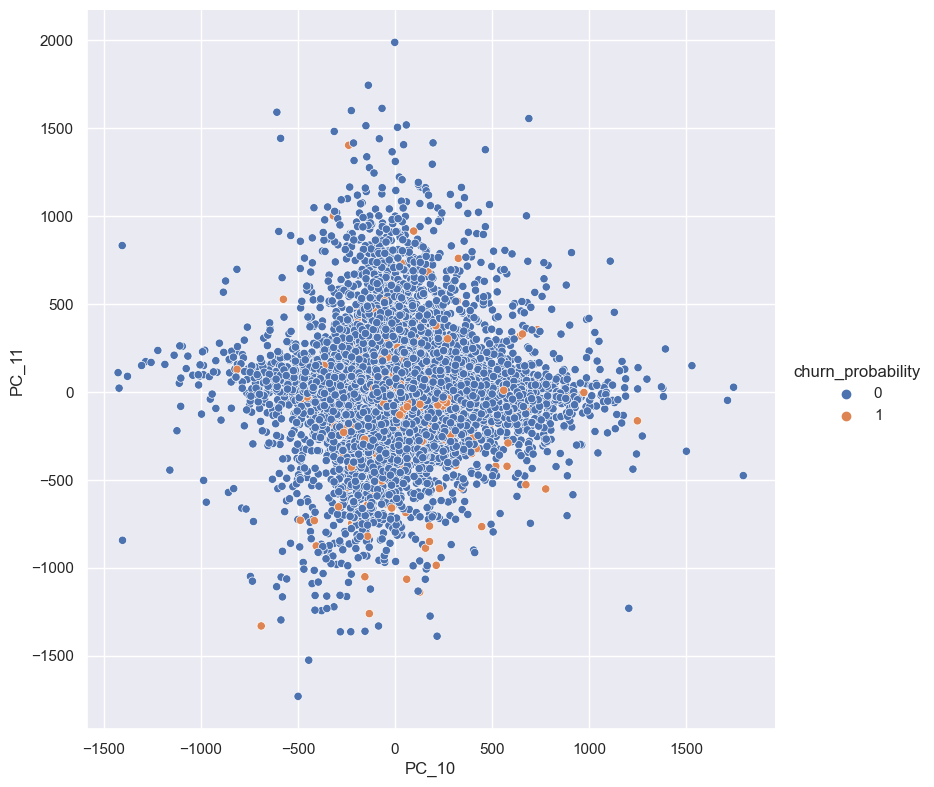

In [94]:
# let's plot

## Plotting principal components 
sns.pairplot(data=data_train_pca, x_vars=["PC_10"], y_vars=["PC_11"], hue = "churn_probability", size=8);

Now, lets use these PCA components in the next model building.

#### Model 2 : PCA + Logistic Regression Model

In [97]:
# X,y Split
y_train_pca = data_train_pca.pop('churn_probability')
X_train_pca = data_train_pca

# Transforming test set with pca ( 25 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca ) 

LogisticRegression(class_weight='balanced', random_state=100)

In [98]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

array([1, 1, 1, 0, 1])

In [99]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([0, 1, 0, 1, 1])

In [100]:
# base line performance
train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.489
Sensitivity / True Positive Rate / Recall : 0.918
Precision / Positive Predictive Value : 0.099
F1-score : 0.179

Test Performance :

Accuracy : 0.497
Sensitivity / True Positive Rate / Recall : 0.906
Precision / Positive Predictive Value : 0.103
F1-score : 0.185


The model performance can be still improved by using Random Forest.

#### Model 3 - PCA + Random Forest

In [103]:
pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 : db_class_ratio_1/(db_class_ratio_0 + db_class_ratio_1) , 1 : db_class_ratio_0/(db_class_ratio_0 + db_class_ratio_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.06093492586490939,
                                     1: 0.9390650741350907},
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [104]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [50,100,150],
    'max_depth' : list(range(5, 15)),
    'min_samples_leaf' : [15,20,25,30],
    'max_features': ['auto', 'sqrt', 'log2']
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 360 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  34 tasks     

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.06093492586490939,
                                                            1: 0.9390650741350907},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=True)

In [105]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best ROC-AUC score : 0.8543995335856247
Best Parameters : {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'n_estimators': 150}


In [106]:
# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.4s finished


In [107]:
# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.1s finished


array([0, 0, 0, 0, 0])

In [108]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished


array([0, 0, 0, 1, 0])

In [109]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.919
Sensitivity / True Positive Rate / Recall : 0.851
Precision / Positive Predictive Value : 0.416
F1-score : 0.559

Test Performance :

Accuracy : 0.894
Sensitivity / True Positive Rate / Recall : 0.604
Precision / Positive Predictive Value : 0.32
F1-score : 0.418


In [110]:
## out of bag error 
pca_rf_best_fit.oob_score_

0.8932506177924218

By far this model has given the highest accuracy and model performance.<br>
Let's try with XGboost as well.

#### Model 4 - PCA + XGboost

In [113]:
pca_xgb = xgb.XGBClassifier(random_state=42, scale_pos_weight= db_class_ratio_0/db_class_ratio_1 ,
                                    tree_method='hist', 
                                   objective='binary:logistic',                                  
                                  )  # scale_pos_weight takes care of class imbalance
pca_xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [114]:
print('Baseline Train AUC Score')
roc_auc_score(y_train, pca_xgb.predict_proba(X_train_pca)[:, 1])

Baseline Train AUC Score


0.9976608926672323

In [115]:
print('Baseline Test AUC Score')
roc_auc_score(y_test, pca_xgb.predict_proba(X_test_pca)[:, 1])

Baseline Test AUC Score


0.8317990387693039

In [116]:
## Hyper parameter Tuning
parameters = {
              'learning_rate': [0.001, 0.01, 0.1],
              'gamma' : [10,20,50],
              'max_depth' : list(range(5, 10)),
              'min_child_weight': [25,50],
              'n_estimators': [50,100,150]}
pca_xgb_search = GridSearchCV(estimator=pca_xgb , param_grid=parameters,scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1)
pca_xgb_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 270 candidates, totalling 1080 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [10, 20, 50],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [5, 6, 7, 8, 9],
                         'min_child_weight': [25, 50],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=1)

In [117]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_xgb_search.best_score_)
print('Best Parameters :', pca_xgb_search.best_params_)

Best ROC-AUC score : 0.8581343775551933
Best Parameters : {'gamma': 10, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 50, 'n_estimators': 150}


In [118]:
# Modelling using the best PCA-XGBoost Estimator 
pca_xgb_best = pca_xgb_search.best_estimator_
pca_xgb_best_fit = pca_xgb_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_train_pca)
y_train_pred_pca_xgb_best[:5]

array([0, 1, 0, 0, 0])

In [119]:
X_train_pca.head()

PC_1         PC_2        PC_3         PC_4         PC_5  \
1712  -33275.321760  -502.641481  957.993396 -1062.696899    64.382291   
11370 -23618.182576  2247.720290 -394.664321  -590.955217  -148.710540   
40444   5456.104866   153.161639 -783.874627  -338.438922    92.702557   
28862  -6125.275090  -879.241484  989.058071  -358.965007  1194.116824   
66555  31567.471512  -720.773779 -234.292163   373.318524  -251.922279   

             PC_6        PC_7        PC_8        PC_9       PC_10       PC_11  \
1712   210.291467 -893.469969  -28.827882  -48.387525  -75.961546  -35.817422   
11370   77.106839   81.177600   20.973966 -117.494917   86.493143  -76.005485   
40444  -83.973208   46.454970   80.380423   17.751800  -72.855390   53.805865   
28862 -269.308937 -571.304462 -188.852674 -251.699529 -106.824951  -54.860892   
66555  811.328828  198.027613  225.585634 -203.867370  297.346498  523.922017   

            PC_12       PC_13       PC_14       PC_15       PC_16       PC_17  \
1712    48.306937   77.872054    0.551426  -61.502048 -105.369567   10.852895   
11370  -47.777135   82.229080   55.513497   94.263907    2.351352   14.594747   
40444  -30.484815  -60.342400  -14.235379  -34.029236  -24.159763  -17.139503   
28862   40.807165   92.885335   16.242540 -298.014235   -0.937772  -15.291815   
66555  492.012655  469.362491 -286.634520  159.070480 -107.346279  214.166052   

            PC_18       PC_19       PC_20      PC_21       PC_22      PC_23  \
1712    29.948219   17.105065    8.590979  13.811101   -5.639369 -44.374113   
11370  -58.423820  -49.486526 -147.603018 -88.638842  -27.349544  25.946169   
40444   39.099849   23.128672  -55.968607 -72.920289   20.912875  18.713784   
28862   30.202942  -40.933728  -86.881352  -9.265348  241.434278  34.908008   
66555 -495.240670  164.922747   15.347951  61.064496  -25.830823 -38.206086   

            PC_24       PC_25  
1712     5.210672  -14.135790  
11370    7.863818   13.434889  
40444   -8.501497   -8.946333  
28862 -189.519049   47.079985  
66555  -32.096237 -150.169064

In [120]:
# Prediction on test set
X_test_pca = pca_final.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index, columns = X_train_pca.columns)
y_test_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_test_pca)
y_test_pred_pca_xgb_best[:5]

array([0, 0, 0, 1, 0])

In [121]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance

train_matrix = confusion_matrix(y_train, y_train_pred_pca_xgb_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_xgb_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.861
Sensitivity / True Positive Rate / Recall : 0.891
Precision / Positive Predictive Value : 0.289
F1-score : 0.436

Test Performance :

Accuracy : 0.837
Sensitivity / True Positive Rate / Recall : 0.717
Precision / Positive Predictive Value : 0.238
F1-score : 0.357


In [122]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance
print('Train AUC Score')
print(roc_auc_score(y_train, pca_xgb_best.predict_proba(X_train_pca)[:, 1]))
print('Test AUC Score')
print(roc_auc_score(y_test, pca_xgb_best.predict_proba(X_test_pca)[:, 1]))

Train AUC Score
0.9432310409162854
Test AUC Score
0.8608433467497958


In [123]:
X_train_pca.shape

(38848, 25)

##### We have build 4 models and out of those 4 Random Forest performs the best based on the accuray score. Hence in the below step we will be creating the pipeline and submission.csv based on Random Forest model.

### Step 9 - Pre-processing on Test.csv

In [126]:
db_test_second = db_test.copy()

In [127]:
db_test.shape

(30000, 171)

In [128]:
db_test.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [129]:
db_test_date_cols = [d for d in db_test.columns.to_list() if 'date' in d]
db_test_date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [130]:
db_test.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6',
 'date_of_last_rech_data_7','date_of_last_rech_data_8'],inplace=True, axis=1)

db_test_date_cols.remove('last_date_of_month_6')
db_test_date_cols.remove('last_date_of_month_7')
db_test_date_cols.remove('last_date_of_month_8')

db_test_date_cols.remove('date_of_last_rech_6')
db_test_date_cols.remove('date_of_last_rech_7')
db_test_date_cols.remove('date_of_last_rech_8')

db_test_date_cols.remove('date_of_last_rech_data_6')
db_test_date_cols.remove('date_of_last_rech_data_7')
db_test_date_cols.remove('date_of_last_rech_data_8')

removed all the date columns

In [132]:
db_test.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 162 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    circle_id           int64  
 2    loc_og_t2o_mou      float64
 3    std_og_t2o_mou      float64
 4    loc_ic_t2o_mou      float64
 5    arpu_6              float64
 6    arpu_7              float64
 7    arpu_8              float64
 8    onnet_mou_6         float64
 9    onnet_mou_7         float64
 10   onnet_mou_8         float64
 11   offnet_mou_6        float64
 12   offnet_mou_7        float64
 13   offnet_mou_8        float64
 14   roam_ic_mou_6       float64
 15   roam_ic_mou_7       float64
 16   roam_ic_mou_8       float64
 17   roam_og_mou_6       float64
 18   roam_og_mou_7       float64
 19   roam_og_mou_8       float64
 20   loc_og_t2t_mou_6    float64
 21   loc_og_t2t_mou_7    float64
 22   loc_og_t2t_mou_8    float64
 23   loc_og_t2m_mou_6    float64
 24   

In [133]:
db_test.shape

(30000, 162)

In [134]:
# Removing duplicate ID columns
db_test.drop(['circle_id'],axis=1,inplace=True)
# db_test.drop(['id'],axis=1,inplace=True)
db_test.shape

(30000, 161)

In [135]:
# Remove Columns with only one unique value
db_test = db_test.loc[:,db_test.nunique()!=1]
db_test.shape

(30000, 152)

In [136]:
# Removing column with 30% or more null values as it will reduce the impact on analysis
db_test = db_test.loc[:,db_test.isnull().sum()/db_test.shape[0]*100<30]
# Shape of the dataframe after removing columns
db_test.shape

(30000, 125)

In [137]:
# check the db_test
def check_db_test(db_test) :
    return pd.DataFrame({
                'Datatype' : db_test.dtypes.astype(str),
                'Null_Count': db_test.isnull().sum().astype(int),
                'Null_Percentage(missing values)': round(db_test.isnull().sum()/len(db) * 100),
                'Non_Null_Count': db.count(axis = 0).astype(int),
                'Unique_Values_Count': db_test.nunique().astype(int)
                 }).sort_values(by='Null_Percentage(missing values)', ascending=False)

check_db_test(db_test)

Datatype  Null_Count  Null_Percentage(missing values)  \
og_others_8         float64        1675                              3.0   
std_og_t2t_mou_8    float64        1675                              3.0   
loc_og_t2m_mou_8    float64        1675                              3.0   
std_ic_t2m_mou_8    float64        1675                              3.0   
loc_og_t2c_mou_8    float64        1675                              3.0   
std_ic_t2t_mou_8    float64        1675                              3.0   
loc_og_mou_8        float64        1675                              3.0   
loc_ic_mou_8        float64        1675                              3.0   
std_og_t2m_mou_8    float64        1675                              3.0   
loc_og_t2t_mou_8    float64        1675                              3.0   
loc_ic_t2f_mou_8    float64        1675                              3.0   
std_og_t2f_mou_8    float64        1675                              3.0   
loc_ic_t2m_mou_8    float64        1675                              3.0   
std_og_mou_8        float64        1675                              3.0   
loc_ic_t2t_mou_8    float64        1675                              3.0   
isd_og_mou_8        float64        1675                              3.0   
std_ic_t2f_mou_8    float64        1675                              3.0   
loc_og_t2f_mou_8    float64        1675                              3.0   
offnet_mou_8        float64        1675                              3.0   
roam_ic_mou_8       float64        1675                              3.0   
ic_others_8         float64        1675                              3.0   
isd_ic_mou_8        float64        1675                              3.0   
onnet_mou_8         float64        1675                              3.0   
spl_ic_mou_8        float64        1675                              3.0   
spl_og_mou_8        float64        1675                              3.0   
std_ic_mou_8        float64        1675                              3.0   
roam_og_mou_8       float64        1675                              3.0   
std_ic_t2m_mou_7    float64        1172                              2.0   
loc_ic_t2f_mou_6    float64        1169                              2.0   
loc_ic_t2t_mou_6    float64        1169                              2.0   
loc_ic_t2t_mou_7    float64        1172                              2.0   
std_ic_t2f_mou_7    float64        1172                              2.0   
ic_others_7         float64        1172                              2.0   
loc_ic_t2m_mou_6    float64        1169                              2.0   
ic_others_6         float64        1169                              2.0   
loc_ic_t2m_mou_7    float64        1172                              2.0   
std_ic_t2f_mou_6    float64        1169                              2.0   
isd_ic_mou_7        float64        1172                              2.0   
std_ic_t2m_mou_6    float64        1169                              2.0   
isd_ic_mou_6        float64        1169                              2.0   
loc_ic_mou_6        float64        1169                              2.0   
loc_ic_mou_7        float64        1172                              2.0   
std_ic_mou_7        float64        1172                              2.0   
std_ic_t2t_mou_6    float64        1169                              2.0   
spl_ic_mou_7        float64        1172                              2.0   
std_ic_t2t_mou_7    float64        1172                              2.0   
og_others_7         float64        1172                              2.0   
spl_ic_mou_6        float64        1169                              2.0   
std_ic_mou_6        float64        1169                              2.0   
loc_ic_t2f_mou_7    float64        1172                              2.0   
og_others_6         float64        1169                              2.0   
loc_og_mou_7        float64        1172                            

In [138]:
db_test.duplicated().sum()

0

In [139]:
db_test.shape

(30000, 125)

In [140]:
# Removing rows with missing values with more than 10 missing values
#db_test.dropna(axis=1,inplace=True,thresh=db.shape[1]-10)
# Shape of the dataframe after removing rows
#print(db_test.shape)

In [141]:
# check for missing values
pd.DataFrame((db_test.isnull().sum()/len(db)*100).sort_values(ascending=False))

0
og_others_8         3.449341
loc_og_t2t_mou_8    3.449341
std_og_t2f_mou_8    3.449341
isd_og_mou_8        3.449341
std_og_t2m_mou_8    3.449341
spl_og_mou_8        3.449341
std_og_t2t_mou_8    3.449341
loc_og_mou_8        3.449341
loc_ic_t2t_mou_8    3.449341
loc_og_t2c_mou_8    3.449341
loc_ic_t2m_mou_8    3.449341
loc_ic_t2f_mou_8    3.449341
loc_og_t2f_mou_8    3.449341
loc_ic_mou_8        3.449341
loc_og_t2m_mou_8    3.449341
std_ic_t2t_mou_8    3.449341
std_og_mou_8        3.449341
onnet_mou_8         3.449341
roam_og_mou_8       3.449341
ic_others_8         3.449341
std_ic_t2f_mou_8    3.449341
roam_ic_mou_8       3.449341
isd_ic_mou_8        3.449341
std_ic_mou_8        3.449341
offnet_mou_8        3.449341
std_ic_t2m_mou_8    3.449341
spl_ic_mou_8        3.449341
std_ic_t2m_mou_7    2.413509
isd_og_mou_7        2.413509
ic_others_7         2.413509
spl_og_mou_7        2.413509
isd_ic_mou_7        2.413509
spl_ic_mou_7        2.413509
og_others_7         2.413509
loc_ic_t2t_mou_7    2.413509
loc_ic_t2m_mou_7    2.413509
std_ic_mou_7        2.413509
loc_ic_mou_7        2.413509
std_ic_t2f_mou_7    2.413509
std_og_mou_7        2.413509
std_ic_t2t_mou_7    2.413509
loc_ic_t2f_mou_7    2.413509
roam_og_mou_7       2.413509
std_og_t2f_mou_7    2.413509
loc_og_t2f_mou_7    2.413509
std_og_t2m_mou_7    2.413509
onnet_mou_7         2.413509
loc_og_t2t_mou_7    2.413509
std_og_t2t_mou_7    2.413509
offnet_mou_7        2.413509
loc_og_t2m_mou_7    2.413509
roam_ic_mou_7       2.413509
loc_og_t2c_mou_7    2.413509
loc_og_mou_7        2.413509
std_og_mou_6        2.407331
std_ic_t2m_mou_6    2.407331
isd_og_mou_6        2.407331
std_ic_t2f_mou_6    2.407331
roam_ic_mou_6       2.407331
roam_og_mou_6       2.407331
std_ic_mou_6        2.407331
spl_ic_mou_6        2.407331
offnet_mou_6        2.407331
isd_ic_mou_6        2.407331
onnet_mou_6         2.407331
ic_others_6         2.407331
loc_og_t2m_mou_6    2.407331
loc_og_t2t_mou_6    2.407331
std_ic_t2t_mou_6    2.407331
std_og_t2t_mou_6    2.407331
std_og_t2f_mou_6    2.407331
spl_og_mou_6        2.407331
std_og_t2m_mou_6    2.407331
loc_og_t2f_mou_6    2.407331
loc_ic_t2t_mou_6    2.407331
og_others_6         2.407331
loc_ic_t2m_mou_6    2.407331
loc_ic_t2f_mou_6    2.407331
loc_og_t2c_mou_6    2.407331
loc_ic_mou_6        2.407331
loc_og_mou_6        2.407331
sachet_2g_8         0.000000
vol_2g_mb_8         0.000000
vol_3g_mb_6         0.000000
vol_3g_mb_7         0.000000
vol_3g_mb_8         0.000000
monthly_2g_6        0.000000
monthly_2g_7        0.000000
monthly_2g_8        0.000000
sachet_2g_6         0.000000
sachet_2g_7         0.000000
aug_vbc_3g          0.000000
jul_vbc_3g          0.000000
sachet_3g_6         0.000000
vol_2g_mb_6         0.000000
aon                 0.000000
sachet_3g_8         0.000000
monthly_3g_6        0.000000
monthly_3g_7        0.000000
monthly_3g_8        0.000000
sachet_3g_7         0.000000
vol_2g_mb_7         0.000000
id                  0.000000
last_day_rch_amt_8  0.000000
last_day_rch_amt_7  0.000000
arpu_7              0.000000
arpu_8              0.000000
total_og_mou_6      0.000000
total_og_mou_7      0.000000
total_og_mou_8      0.000000
arpu_6              0.000000
total_ic_mou_6      0.000000
total_ic_mou_7      0.000000
total_ic_mou_8      0.000000
total_rech_num_6    0.000000
total_rech_num_7    0.000000
total_rech_num_8    0.000000
total_rech_amt_6    0.000000
total_rech_amt_7    0.000000
total_rech_amt_8    0.000000
max_rech_amt_6      0.000000
max_rech_amt_7      0.000000
max_rech_amt_8      0.000000
last_day_rch_amt_6  0.000000
jun_vbc_3g          0.000000

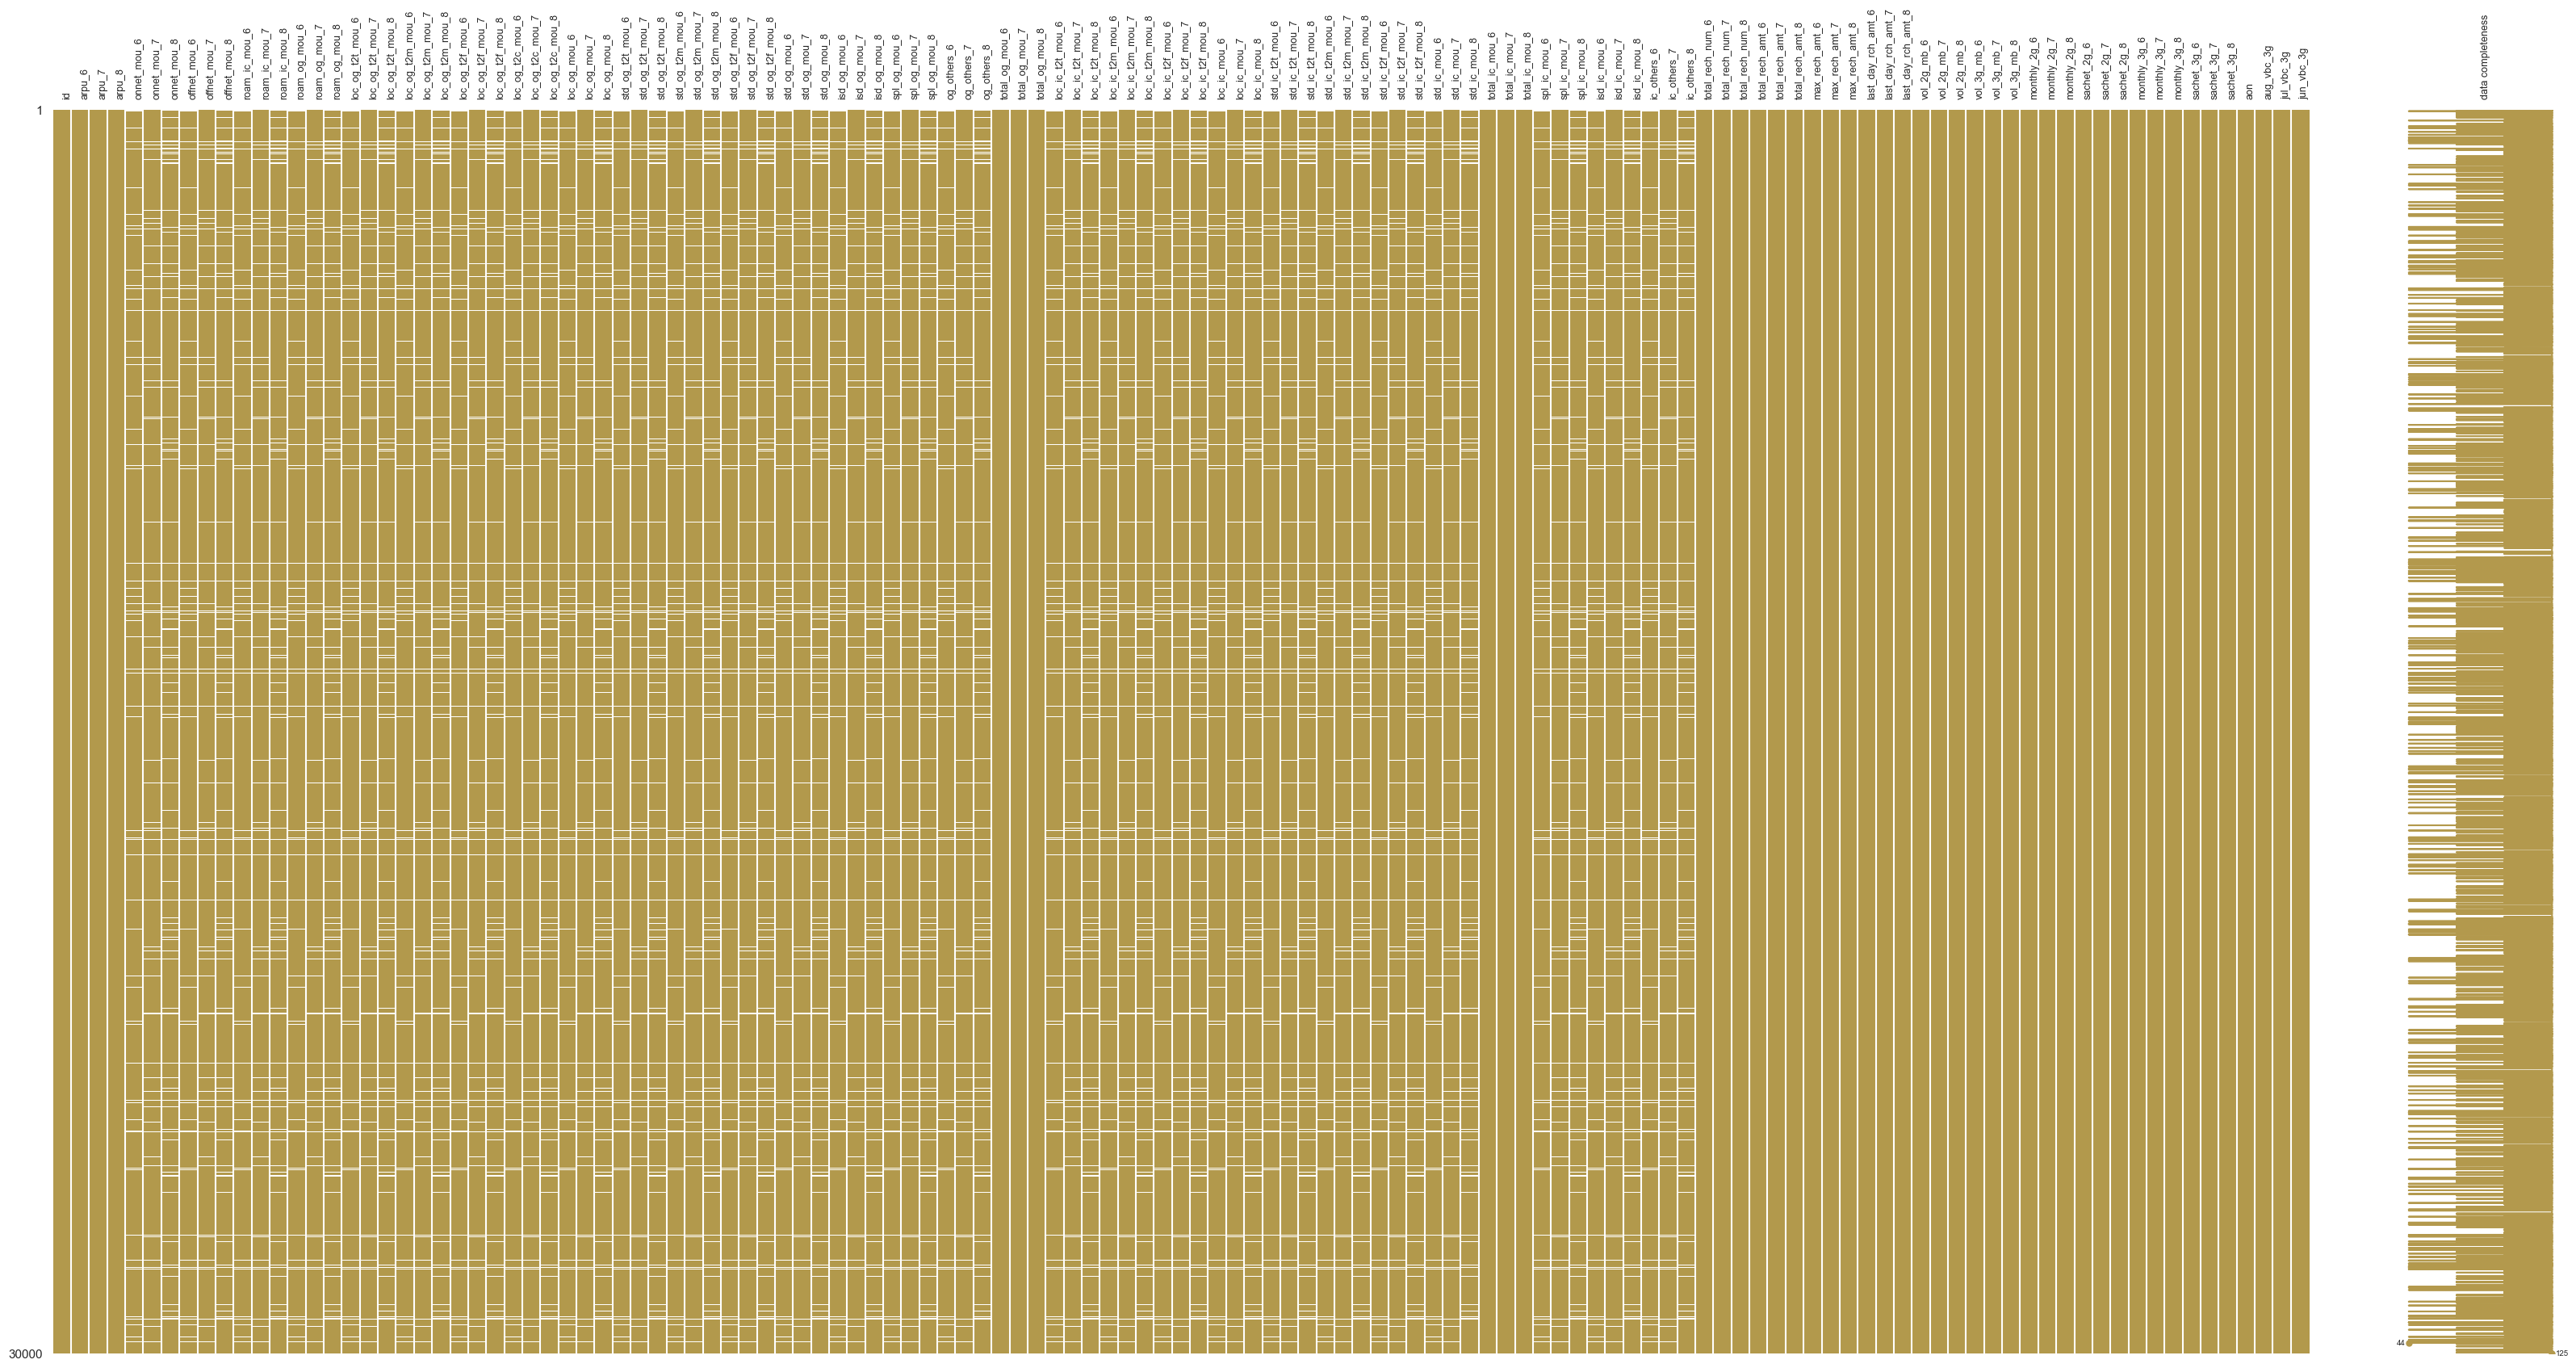

<Figure size 4000x2000 with 0 Axes>

In [142]:
# use visual to see missing values

msno.matrix(db_test,figsize=(40,20),fontsize=9,color=(0.7, 0.6, 0.3),sparkline=True,labels=True,label_rotation=90)
plt. figure(figsize=(40,20))
plt.show()

Their are missging values hence will use MICE

In [144]:
# Initialize the imputer
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=42)

# Fit and transform the entire dataset
db_test_imputed = imputer.fit_transform(db_test)

# Convert the imputed array back to DataFrame
db_test_imputed = pd.DataFrame(db_test_imputed, columns=db_test.columns)

# Replace the original dataframe with the imputed one
db_test = db_test_imputed

In [145]:
#cross checking for removed missing values
#pd.DataFrame((db_test.isnull().sum()/len(db_test)*100).sort_values(ascending=False))

In [146]:
db_test.shape

(30000, 125)

In [147]:
# Remove Columns with only one unique value
#db_test = db_test.loc[:,db_test.nunique()!=1]
#db_test.shape

In [148]:
db_test.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  69999.0   91.882   65.330   64.445        31.78        20.23        23.11   
1  70000.0  414.168  515.568  360.868        75.51        41.21        19.84   
2  70001.0  329.844  434.884  746.239         7.54         7.86         8.40   
3  70002.0   43.550  171.390   24.400         5.31         2.16         0.00   
4  70003.0  306.854  406.289  413.329       450.93       609.03       700.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         60.16         32.16         34.83           0.00           0.00   
1        474.34        621.84        394.94           0.00           0.00   
2         16.98         45.81         45.04          22.81         103.38   
3         40.04        205.01         24.01           0.00           0.00   
4         60.94         23.84         74.16           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1           0.00           0.00           0.00           0.00   
2          26.08          24.53          53.68          54.44   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             24.88             20.23             21.06             18.13   
1             75.51             41.21             19.84            473.61   
2              0.00              0.00              0.00              0.00   
3              5.31              0.00              0.00              2.94   
4              0.45              0.78             14.56              2.39   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             10.89              8.36              0.00             13.58   
1            598.08            377.26              0.73              0.00   
2              0.00              0.00              0.00              0.00   
3             98.61             20.51              0.00              0.00   
4              2.66             10.94              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.03   
1              0.00               0.0              0.00              0.00   
2              0.00               0.0              0.00              0.00   
3              2.35               0.0              6.18              0.00   
4              0.00               0.0              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         43.01         44.71         29.43              6.90   
1        549.86        639.29        397.11              0.00   
2          0.00          0.00          0.00              0.00   
3          8.26         98.61         22.86              0.00   
4          2.84          3.44         25.51            450.48   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              2.05             42.03              7.68   
1              0.00              0.00              0.00             23.76   
2              0.00              0.00              0.00              0.00   
3              2.16              0.00             37.09             94.36   
4            608.24            686.11             58.54             21.18   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             26.43               0.0               0.0               0.0   
1             17.68               0.0               0.0               0.0   
2              0.00               0.0               0.0               0.0   
3              0.00               0.0               0.0               0.0   
4             63.18               0.0        

In [149]:
X_train.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
1712    1712  273.520  287.503  292.575       504.08       653.43   
11370  11370  188.516  226.896   62.383        49.26        49.14   
40444  40444    9.086    0.000  115.238         1.51         0.00   
28862  28862    3.500  495.994  560.511         0.00       567.51   
66555  66555  551.403  315.655  133.876        40.09        15.94   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
1712        649.06         10.04          7.01          4.68           0.00   
11370        17.61         52.33         58.44         20.28           0.00   
40444         0.00          0.00          0.00         65.26           0.00   
28862       686.86          0.38        149.83        363.58           3.48   
66555         0.00        245.41        129.11          0.00           0.00   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
1712            0.00           0.00           0.00           0.00   
11370          22.31          14.09           0.00          88.61   
40444           0.00           0.00           0.00           0.00   
28862           0.00           0.00           3.34           0.00   
66555           0.00           0.00           0.00           0.00   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
1712            0.00              2.34              0.00              0.00   
11370          19.33             28.89              6.74              2.76   
40444           0.00              1.51              0.00              0.00   
28862           0.00              0.00             14.78            132.76   
66555           0.00             29.88              7.36              0.00   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
1712               2.48              0.00              0.00              0.00   
11370             49.99              9.44             12.03              0.48   
40444              0.00              0.00             51.33              0.00   
28862              0.00             38.79            266.61              0.00   
66555            230.74            128.38              0.00              0.96   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
1712                0.0               0.0              7.56              2.26   
11370               0.0               0.0              0.00              2.30   
40444               0.0               0.0              0.00              0.00   
28862               0.0               0.0              0.00              0.00   
66555               0.0               0.0              0.00              0.00   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
1712                0.0          4.83          0.00          0.00   
11370               0.0         79.38         16.19         14.79   
40444               0.0          1.51          0.00         51.33   
28862               0.0          0.00         53.58        399.38   
66555               0.0        261.59        135.74          0.00   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
1712             501.73            653.43            649.06              0.00   
11370             20.36              1.00              3.76              1.84   
40444              0.00              0.00              0.00              0.00   
28862              0.00            552.73            554.09              0.00   
66555             10.21              8.58              0.00             13.69   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
1712               2.46              4.68               0.0               0.0   
11370              1.78              0.00               0.0               0.0   
40444              0.00             13.93               0.0               0.0   
28862            111.03             

In [150]:
X_train.shape

(38848, 125)

In [151]:
db_test_list_convert = db_test.columns.to_list()

#### Creating pipeline

In [153]:
imp = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=42)
scale = StandardScaler()
pca_one = PCA(n_components=25)
rfModel = RandomForestClassifier(random_state=42, 
                                oob_score=True, n_jobs=-1,verbose=1,
                                n_estimators  = 150,
                                max_depth = 14,
                                min_samples_leaf = 15,
                                max_features = 'sqrt'
                                
                                )
#xgBoost = xgb.XGBClassifier(random_state=42, scale_pos_weight= db_class_ratio_0/db_class_ratio_1 ,
                                   # tree_method='hist', 
                                  # objective='binary:logistic',
                                  # gamma= 10, learning_rate= 0.1, max_depth= 8, min_child_weight= 50, n_estimators= 100
                           #)

In [154]:
pipe = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca_one),
                         ('model',rfModel)])

In [155]:
pipe.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    9.3s finished


Pipeline(steps=[('imputation',
                 IterativeImputer(estimator=BayesianRidge(), random_state=42)),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=25)),
                ('model',
                 RandomForestClassifier(max_depth=14, min_samples_leaf=15,
                                        n_estimators=150, n_jobs=-1,
                                        oob_score=True, random_state=42,
                                        verbose=1))])

In [156]:
X_train.shape

(38848, 125)

In [157]:
pipe.score(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.1s finished


0.9470242998352554

In [158]:
pipe.score(X_test, y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.1s finished


0.9388385502471169

In [159]:
confusion_matrix(y_train, pipe.predict(X_train))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.1s finished


array([[36456,    47],
       [ 2011,   334]])

In [160]:
confusion_matrix(y_test, pipe.predict(X_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished


array([[9076,   22],
       [ 572,   42]])

In [161]:
precision_score(y_test, pipe.predict(X_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished


0.65625

In [162]:
recall_score(y_test, pipe.predict(X_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished


0.06840390879478828

### Step 10 - Preparing Submission file

In [164]:
db_test.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  69999.0   91.882   65.330   64.445        31.78        20.23        23.11   
1  70000.0  414.168  515.568  360.868        75.51        41.21        19.84   
2  70001.0  329.844  434.884  746.239         7.54         7.86         8.40   
3  70002.0   43.550  171.390   24.400         5.31         2.16         0.00   
4  70003.0  306.854  406.289  413.329       450.93       609.03       700.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         60.16         32.16         34.83           0.00           0.00   
1        474.34        621.84        394.94           0.00           0.00   
2         16.98         45.81         45.04          22.81         103.38   
3         40.04        205.01         24.01           0.00           0.00   
4         60.94         23.84         74.16           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1           0.00           0.00           0.00           0.00   
2          26.08          24.53          53.68          54.44   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             24.88             20.23             21.06             18.13   
1             75.51             41.21             19.84            473.61   
2              0.00              0.00              0.00              0.00   
3              5.31              0.00              0.00              2.94   
4              0.45              0.78             14.56              2.39   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             10.89              8.36              0.00             13.58   
1            598.08            377.26              0.73              0.00   
2              0.00              0.00              0.00              0.00   
3             98.61             20.51              0.00              0.00   
4              2.66             10.94              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.03   
1              0.00               0.0              0.00              0.00   
2              0.00               0.0              0.00              0.00   
3              2.35               0.0              6.18              0.00   
4              0.00               0.0              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         43.01         44.71         29.43              6.90   
1        549.86        639.29        397.11              0.00   
2          0.00          0.00          0.00              0.00   
3          8.26         98.61         22.86              0.00   
4          2.84          3.44         25.51            450.48   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              2.05             42.03              7.68   
1              0.00              0.00              0.00             23.76   
2              0.00              0.00              0.00              0.00   
3              2.16              0.00             37.09             94.36   
4            608.24            686.11             58.54             21.18   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             26.43               0.0               0.0               0.0   
1             17.68               0.0               0.0               0.0   
2              0.00               0.0               0.0               0.0   
3              0.00               0.0               0.0               0.0   
4             63.18               0.0        

In [165]:
#submission_data = db_test_second.set_index('id')
#submission_data.shape

In [166]:
db_test['churn_probability'] = pipe.predict(db_test)
output = db_test[['id','churn_probability']]
output.head()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.1s finished


id  churn_probability
0  69999.0                  0
1  70000.0                  0
2  70001.0                  0
3  70002.0                  0
4  70003.0                  0

In [167]:
output['id'] = output['id'].astype(int)

In [168]:
output.to_csv('submission.csv',index=False)

In [169]:
output.dtypes

id                   int64
churn_probability    int64
dtype: object